## Intro
## Foot_Plantar_Pressure_Points

/Users/lsw/work.Local/TF2_books_code_test/course_2020/Foot_Plantar_Pressure_Points

todo: move to note.py


## import os
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# plt.style.use("bmh")

import cv2
import tensorflow as tf






In [1]:
import os
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# plt.style.use("bmh")

import cv2
import tensorflow as tf

from datetime import datetime
import seaborn as sns

import errno

# from adabelief_tf import AdaBeliefOptimizer

In [2]:
print(tf.__version__)
print(cv2.__version__)

2.3.1
4.3.0


### 1. EDA

a simple Exploratory Data Analysis

In [3]:
def get_img(path):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

def get_img_by_id(df_index):
    img_name = df.iloc[df_index, 0] # [index, table] or [row, columns]
    t_img_p = 'train/images/' + img_name
    return get_img(t_img_p)

    
def what_dtype(data):
    return print(f'dtype: {data.dtype}, shape: {data.shape}')
    
def plt_img(img):
    #plt.figure(figsize=(6,6))
#     plt.title(f'dtype: {img.dtype}')
    plt.axis("off")
    plt.imshow(img)

def plt_points(img, x, y):
    cv2.circle(img, (x,y), 3, (0,0,213), -1)
    
def cvshow_img(img):
    """cvshow_img(img) display imgage with OS's app window not in the notebook."""
    cv2.imshow('cv image', img)
    cv2.waitKey(500)
    cv2.destroyAllWindows()

dtype: uint8, shape: (400, 120, 3)


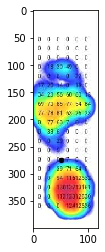

In [4]:
t_img_p = 'train/images/image_0001.png'
img = get_img(t_img_p)
plt.figure()
plt.imshow(img)

what_dtype(img)

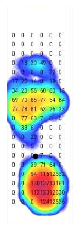

In [5]:
plt_img(img)

In [6]:
ann = 'train/annotation.csv'
df = pd.read_csv(ann)

### 

In [7]:
df.head()

images  x1   y1  x2   y2
0  image_0001.png  55  136  75  383
1  image_0002.png  62  139  42  385
2  image_0003.png  47  117  76  368
3  image_0004.png  66  119  37  376
4  image_0005.png  58  147  85  381

In [8]:
df.describe()

x1           y1          x2           y2
count  1000.000000  1000.000000  1000.00000  1000.000000
mean     57.679000   133.471000    54.78000   377.934000
std       8.145693    14.154629    24.19804     7.757049
min      24.000000    99.000000    10.00000   334.000000
25%      53.000000   122.750000    31.00000   375.000000
50%      58.000000   136.000000    53.50000   381.000000
75%      62.250000   142.000000    78.00000   383.000000
max      84.000000   182.000000    96.00000   387.000000

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
images    1000 non-null object
x1        1000 non-null int64
y1        1000 non-null int64
x2        1000 non-null int64
y2        1000 non-null int64
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


In [10]:
df.columns

Index(['images', 'x1', 'y1', 'x2', 'y2'], dtype='object')

In [11]:
df.shape

(1000, 5)

In [12]:
df.index

RangeIndex(start=0, stop=1000, step=1)

In [13]:
df.iloc[0:2,:]

images  x1   y1  x2   y2
0  image_0001.png  55  136  75  383
1  image_0002.png  62  139  42  385

In [14]:
print(f'df list size : {len(df)}, Index: {df.index}')

df_index = 0
print(f'Image: {df.images[df_index]} x1:{df.x1[df_index]} y1:{df.y1[df_index]} x1:{df.x2[df_index]} y1:{df.y2[df_index]}')

df list size : 1000, Index: RangeIndex(start=0, stop=1000, step=1)
Image: image_0001.png x1:55 y1:136 x1:75 y1:383


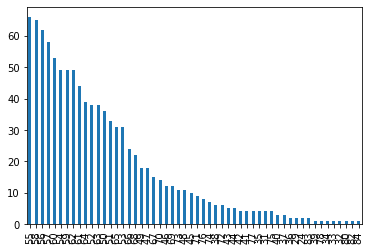

In [15]:
df.x1.value_counts().plot(kind="bar")

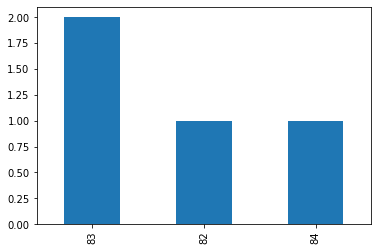

In [16]:
df[df.x1 > 80].x1.value_counts().plot(kind="bar")

In [17]:
# the range of pp points.
print(f'x1: {df.x1.min()} ~ {df.x1.max()},\t mean: {df.x1.mean()},\t x1-bound-len: {df.x1.max() - df.x1.min()}')
print(f'y1: {df.y1.min()} ~ {df.y1.max()},\t mean: {df.y1.mean()},\t y1-bound-len: {df.y1.max() - df.y1.min()}')
print(f'x2: {df.x2.min()} ~ {df.x2.max()},\t mean: {df.x2.mean()},\t x2-bound-len: {df.x2.max() - df.x2.min()}')
print(f'y2: {df.y2.min()} ~ {df.y2.max()},\t mean: {df.y2.mean()},\t y2-bound-len: {df.y2.max() - df.y2.min()}')

x1: 24 ~ 84,	 mean: 57.679,	 x1-bound-len: 60
y1: 99 ~ 182,	 mean: 133.471,	 y1-bound-len: 83
x2: 10 ~ 96,	 mean: 54.78,	 x2-bound-len: 86
y2: 334 ~ 387,	 mean: 377.934,	 y2-bound-len: 53


Although the limit bound of x12, y12 are lower than 100 pixels, using the same dimension of the x-axis (width of the whole heel) may better fit the 'heel''s left and right phenomena.

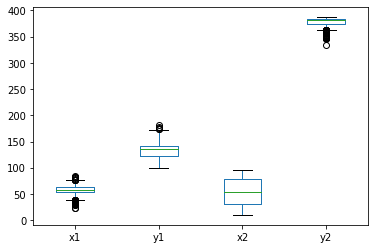

In [18]:
df[1:].plot(kind='box')

CPU times: user 2.77 s, sys: 29.6 ms, total: 2.8 s
Wall time: 2.79 s


Text(0.5, 1.0, 'Scatter Plot')

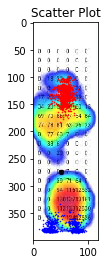

In [19]:
%%time
# plt.figure(figsize=(1.2,4.0))
# plt.xlim(0,120)
# plt.ylim(0,400)
# plt_img(img)

plt.imshow(img)
for df_index in range(1000):
    plt.plot(df.x1[df_index], df.y1[df_index], 'r.', markersize=1)
    plt.plot(df.x2[df_index], df.y2[df_index], 'b.', markersize=1)
plt.title("Scatter Plot")

In [20]:
# check y1 range
df[df.y1 > 180]

images  x1   y1  x2   y2
662  image_0663.jpg  48  182  53  383

### 正確分佈
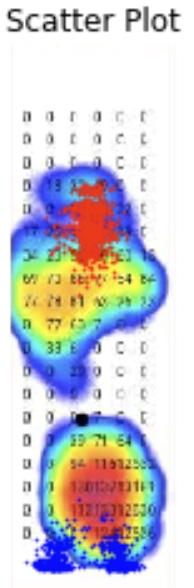


x1y1 55 136
x2y2 75 383
matplotlib/cv2以左上角原點，np以row,column對應則為：x=column, y=row


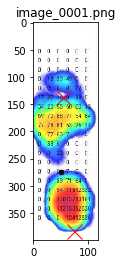

In [21]:
df_index = 0
img_name = df.iloc[df_index, 0] # [index, table] or [row, columns]

t_img_p = 'train/images/' + img_name
img = get_img(t_img_p)
plt.figure()
plt.imshow(img)
plt.plot(df.x1[df_index], df.y1[df_index], 'rx', markersize=15)
plt.plot(df.x2[df_index], df.y2[df_index], 'rx', markersize=15)
plt.title(img_name)

print('x1y1', df.x1[df_index], df.y1[df_index])
print('x2y2', df.x2[df_index], df.y2[df_index])
print('matplotlib/cv2以左上角原點，np以row,column對應則為：x=column, y=row')

CPU times: user 12.8 ms, sys: 1.07 ms, total: 13.9 ms
Wall time: 12.9 ms


Text(0.5, 1.0, 'Scatter Plot')

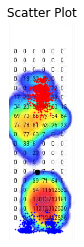

In [22]:
%%time
# plt.figure(figsize=(1.2,4.0))

plt_img(img)
plt.plot(df.x1, df.y1, 'r.', markersize=1)
plt.plot(df.x2, df.y2, 'b.', markersize=1)
plt.title("Scatter Plot")

# plt.xlim(0,120)
# plt.ylim(0,400)

CPU times: user 12.7 ms, sys: 148 µs, total: 12.9 ms
Wall time: 10.9 ms


Text(0.5, 1.0, 'Scatter Plot upside down')

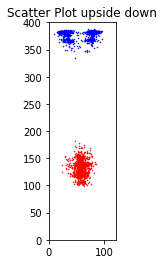

In [23]:
%%time
plt.figure(figsize=(1.2,4.0))
plt.ylim(0,400)
plt.xlim(0,120) #somehow add the x-ylim cause the upside down.

# plt_img(img)
plt.plot(df.x1, df.y1, 'r.', markersize=1)
plt.plot(df.x2, df.y2, 'b.', markersize=1)
plt.title("Scatter Plot upside down")

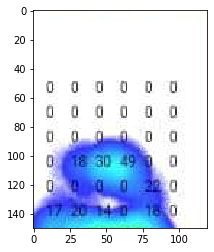

In [24]:
# 注意toe切割，要以y1最大範圍為準. y1: 99 ~ 182,	 mean: 133.471

# When image[x,y], 
# if array[row, column] = [0:150, 0:200]

plt.imshow(img[0:150, 0:200])

In [25]:
def plt_ud_points(df_index):
    img_name = df.iloc[df_index, 0] # [index, table] or [row, columns]

    t_img_p = 'train/images/' + img_name
    img = get_img(t_img_p)
#     plt.figure()
    plt.imshow(img)
    plt.plot(df.x1[df_index], df.y1[df_index], 'r+', markersize=15)
    plt.plot(df.x2[df_index], df.y2[df_index], 'b+', markersize=15)
    plt.axis("off")
    plt.title(img_name)

def plt_ud_points_lines(df_index):
    img_name = df.iloc[df_index, 0] # [index, table] or [row, columns]

    t_img_p = 'train/images/' + img_name
    img = get_img(t_img_p)
#     plt.figure()
    plt.imshow(img)
    plt.plot(df.x1[df_index], df.y1[df_index], 'r+', markersize=15, mew=3)
    plt.plot(df.x2[df_index], df.y2[df_index], 'b+', markersize=15, mew=3)
    # line
    x = [df.x1[df_index], df.x2[df_index]]
    y = [df.y1[df_index], df.y2[df_index]]
    plt.plot(x, y, 'k-', lw=3)
    
    plt.axis("off")
    plt.title(img_name)
    
def plt_ud_point(df_index):
    img_name = df.iloc[df_index, 0] # [index, table] or [row, columns]

    t_img_p = 'train/images/' + img_name
    img = get_img(t_img_p)
    plt.figure()
    plt.imshow(img)
    plt.plot(df.x1[df_index], df.y1[df_index], 'r+', markersize=15)
    plt.plot(df.x2[df_index], df.y2[df_index], 'b+', markersize=15)
    print(f'up[{df.x1[df_index]}, {df.y1[df_index]}], down[{df.x2[df_index]}, {df.y2[df_index]}]')
    plt.axis("off")
    plt.title(img_name)

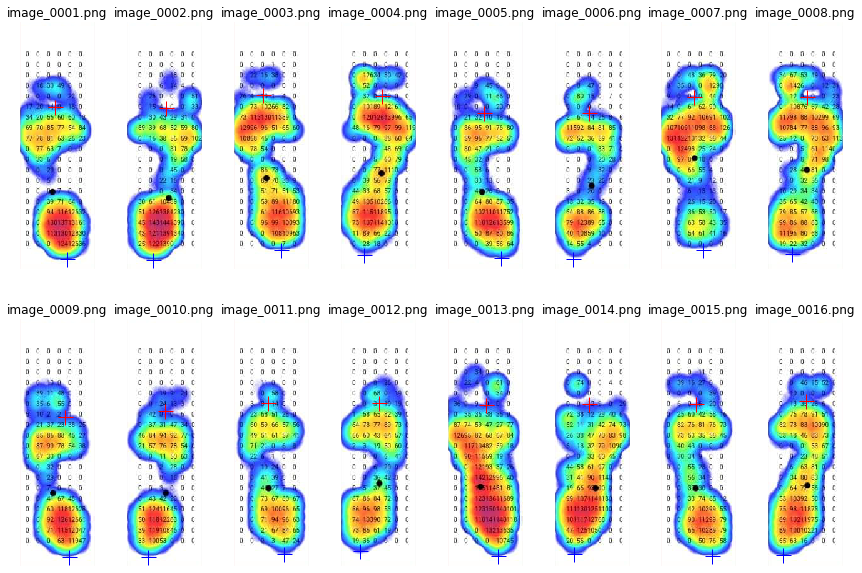

In [26]:
"""
image_0205.jpg 僅有右腳 打亂後面的12左右 34左右排序
"""

"""
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Passing non-integers 
as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.

plt.subplot(cr/2, cr*2, i-step+1) ->>  plt.subplot(int(cr/2), int(cr*2), int(i-step+1))
"""
head_num = 16
step = 0 # each 10s
col_row = np.sqrt(int(head_num))
cr = col_row

plt.figure(figsize=(15, 10))
for i in range(step, step+head_num):
    if step > 200:
        ax = plt.subplot(int(cr/2), int(cr*2), int(i-step+1))
    else:
        ax = plt.subplot(int(cr/2), int(cr*2), int(i-step+1))
    plt_ud_points(i)


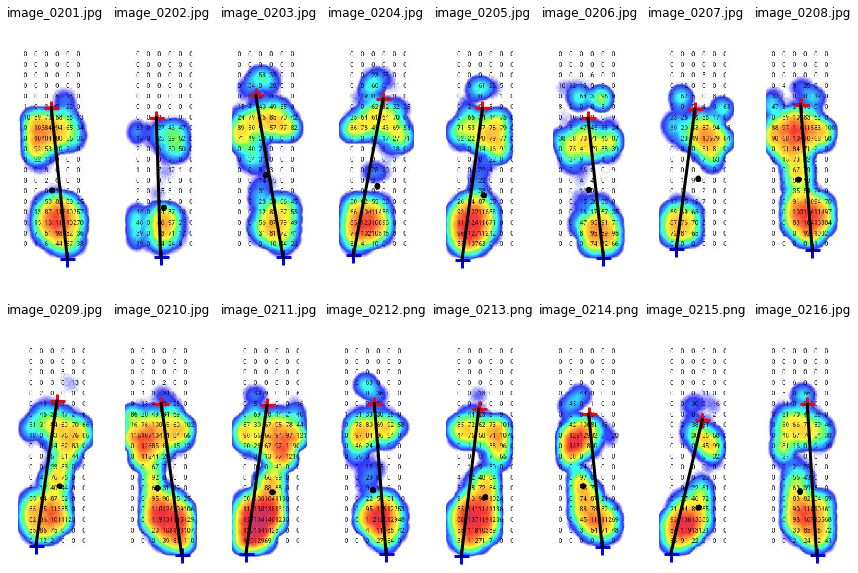

In [27]:
"""
image_0205.jpg 僅有右腳 打亂後面的12左右 34左右排序
"""
head_num = 16
step = 200 # each 10s
col_row = np.sqrt(int(head_num))
cr = col_row

plt.figure(figsize=(15, 10))
for i in range(step, step+head_num):
    if step > 200:
        ax = plt.subplot(int(cr/2), int(cr*2), int(i-step+1))
    else:
        ax = plt.subplot(int(cr/2), int(cr*2), int(i-step+1))
    plt_ud_points_lines(i)


CPU times: user 5.79 s, sys: 183 ms, total: 5.97 s
Wall time: 11.2 s


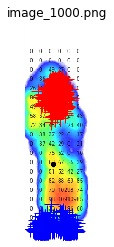

In [28]:
%%time
for i in range(1000):
    plt_ud_points(i)

up[50, 154], down[57, 380]


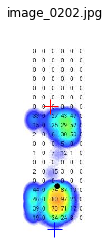

In [29]:
plt_ud_point(201)

up[63, 137], down[38, 381]


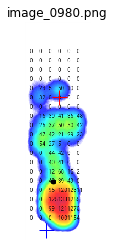

In [30]:
#image_0980.png is wrong data.
plt_ud_point(980-1)

### trail 1
        (1) band rejection (排除黑字和黑點)
        (2) median filter (黑字和黑點補色)
        (3) color conversion (將彩色轉換成壓力)

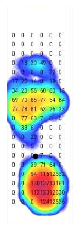

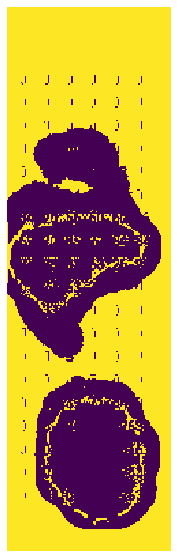

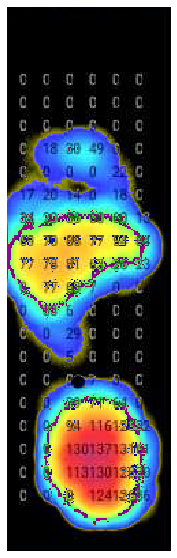

In [31]:
# org image
t_img_p = 'train/images/' + img_name
img = get_img(t_img_p)
# plt.figure(figsize=(15, 10))
plt.figure()
plt_img(img)


# mask some color
t_img_p = 'train/images/' + img_name
img = get_img(t_img_p)

# create NumPy arrays from the boundaries
lower = [100, 100, 100]
upper = [255, 255, 255]
lower = np.array(lower, dtype = "uint8")
upper = np.array(upper, dtype = "uint8")
# find the colors within the specified boundaries and apply
# the mask
mask = cv2.inRange(img, lower, upper)
plt.figure(figsize=(3,10))
plt_img(mask)


# output = cv2.bitwise_and(img, img, mask = mask)
output = cv2.bitwise_not(img, img, mask = mask)
plt.figure(figsize=(3,10))
plt_img(output)



### 左右判斷
依據足跟分佈靠左靠右則為右腳左腳

取ROI投影於x軸上，取分佈重心位置。

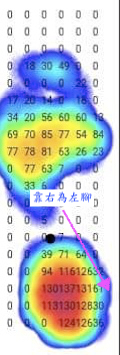

<Figure size 1080x720 with 0 Axes>

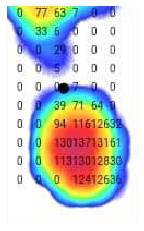

In [32]:
# crop Heel (the lower part of image) #
img = get_img_by_id(0)

# crop location
x=200
y=0
w=400
h=120

# crop location, rows, columns
row=200
col=0
rows=400
cols=120


# crop_image = img[x:w, y:h]
crop_image = img[row:rows, col:cols]


# cv2.imshow("Cropped", crop_image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

plt.figure(figsize=(15, 10))
plt.figure()
plt_img(crop_image)

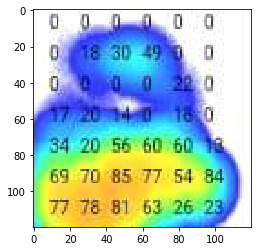

In [33]:
# 注意toe切割，要以y1最大範圍為準. y1: 99 ~ 182,	 mean: 133.471

# When image[x,y], 
# if array[row, column] = [0:150, 0:120]

# plt.imshow(img[0:150, 0:120])
plt.imshow(img[80:200, 0:120])
# plt.imshow(img[y_offset_toe:y_offset_toe+120, 0:120])

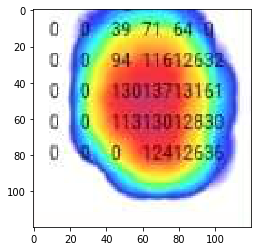

In [34]:
# heel
plt.imshow(img[280:280+120, 0:120])

# plt.imshow(img[y_offset_heel:y_offset_heel+120, 0:120])

### 2. Parameters

#### Image size, Batch size, toe/heel-offset.

In [35]:
BATCH_SIZE = 64 # 16 #32 #64 #128 #32 #64 #todo: reduce the BS maybe help to reduce the loss
img_height = 120 #512 #224 #100
img_width = 120 #512 #224 #100

y_offset_toe = 80
y_offset_heel = 280 #400-120=280

#### tf MirroredStrategy seting

In [36]:

# tf MirroredStrategy seting
strategy = tf.distribute.MirroredStrategy()
REPLICAS = strategy.num_replicas_in_sync
print('\nNumber of REPLICAS: {}\n'.format(REPLICAS))


MULTI_BATCH_SIZE = BATCH_SIZE * strategy.num_replicas_in_sync
print('BATCH_SIZE: {}, MULTI_BATCH_SIZE: {}'.format(BATCH_SIZE, MULTI_BATCH_SIZE))



INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)

Number of REPLICAS: 1

BATCH_SIZE: 64, MULTI_BATCH_SIZE: 64


In [37]:
# 自動調節tf.data管道
AUTOTUNE = tf.data.experimental.AUTOTUNE

### 3. Create the training dataset W/ croped


#### Load samples as data-farame

In [38]:

# # data-org #
# ann = 'annotation_1424_merge.csv'
# im_p = 'train/images/'
# df[1335:]


# # data-org-augm#
# ann = 'annotation_2848_augm.csv'
# im_p = 'train_augm/images/'
# df[1335:]


# data-train #
# ann = 'annotation_1345_good.csv'
# im_p = 'train/images/'

# data-augm #
ann = 'annotation_2690_augm.csv'
im_p = 'train_augm/images/'
df[1335:]

# # data-train-HPL-1223
# ann = 'annotation_1123_HPL_Good.csv'
# im_p = 'train/images/'

df = pd.read_csv(ann)
df[1120:]

images  x1   y1  x2   y2
1120     image_6195.jpg  52  127  75  370
1121     image_6196.jpg  62  138  29  383
1122     image_6197.jpg  54  135  78  380
1123     image_6198.jpg  60  125  29  384
1124     image_6199.jpg  51  147  70  353
...                 ...  ..  ...  ..  ...
2685  image_af-6419.jpg  60  135  50  381
2686  image_af-6421.jpg  67  157  44  376
2687  image_af-6422.jpg  71  154  87  375
2688  image_af-6423.jpg  56  149  44  381
2689  image_af-6424.jpg  65  147  84  385

[1570 rows x 5 columns]

In [39]:
len(df)

2690

#### Shuffle and reset index

In [40]:
# keep index
# df = df.sample(frac=1) #
# df.head(5)

In [41]:
# reset index
df = df.sample(frac=1).reset_index(drop=True)

In [42]:
df.head(10)

images  x1   y1  x2   y2
0     image_0593.jpg  57  107  41  363
1  image_af-6334.jpg  60  118  83  379
2     image_0778.png  46  137  84  380
3     image_0429.png  56  122  77  383
4  image_af-6229.jpg  64  156  95  381
5     image_6099.png  51  154  93  382
6  image_af-0137.png  70  107  41  383
7  image_af-0906.png  62  137  49  383
8  image_af-6404.jpg  54  137  90  382
9     image_6380.jpg  62  121  33  382

See, the image_####.jpg now are random.

#### Create tf.dataset (DS)

In [43]:
# from dataframe
list_ds = tf.data.Dataset.from_tensor_slices((df['images'], df['x1'], df['y1'], df['x2'], df['y2']))
# list_ds = list_ds.shuffle(image_count, reshuffle_each_iteration=True) #todo: move to ds_pre. see https://www.tensorflow.org/api_docs/python/tf/data/Dataset#shuffle

In [44]:
len(list_ds)#.shape() #take(1)

2690

In [45]:
# check The type specification of an element of this dataset.
list_ds.element_spec


(TensorSpec(shape=(), dtype=tf.string, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None))

In [46]:
for f,x1,y1,x2,y2 in list_ds.take(5):
    print(f'take sample: {f} {x1} {y1} {x2} {y2}')

take sample: b'image_0593.jpg' 57 107 41 363
take sample: b'image_af-6334.jpg' 60 118 83 379
take sample: b'image_0778.png' 46 137 84 380
take sample: b'image_0429.png' 56 122 77 383
take sample: b'image_af-6229.jpg' 64 156 95 381


In [47]:
# use np decode to UTF-8
print(f.numpy().decode('UTF-8'))

image_af-6229.jpg


In [48]:
len(list_ds)

2690

#### Check ds iterator for consuming

In [49]:
# create a Python iterator

it_list_ds = iter(list_ds) # Make sure iter ds only once.

In [50]:
# using iter and consuming its elements using next: every print different image name.

for i in range(4):
    image, x1, y1, x2, y2 = next(it_list_ds)
    print(image.numpy(), x1.numpy(), y1.numpy())

b'image_0593.jpg' 57 107
b'image_af-6334.jpg' 60 118
b'image_0778.png' 46 137
b'image_0429.png' 56 122


In [51]:
# image_batch, label_batch = valid_ds_pre_s.as_numpy_iterator().next()
# pred = model.predict_on_batch(image_batch)


for i in range(4):
    image, x1, y1, x2, y2 = list_ds.as_numpy_iterator().next()# every time create a new iter, so need put iter out of above cell.
    print(image, x1, y1, x2, y2)
    
iter_test_list = list_ds.as_numpy_iterator()
print("===== Create iterator once and pull out to above cell. =====")
for i in range(4):
    image, x1, y1, x2, y2 = iter_test_list.next()
    print(image, x1, y1, x2, y2)


b'image_0593.jpg' 57 107 41 363
b'image_0593.jpg' 57 107 41 363
b'image_0593.jpg' 57 107 41 363
b'image_0593.jpg' 57 107 41 363
===== Create iterator once and pull out to above cell. =====
b'image_0593.jpg' 57 107 41 363
b'image_af-6334.jpg' 60 118 83 379
b'image_0778.png' 46 137 84 380
b'image_0429.png' 56 122 77 383


#### Process path to image tensor in DS

In [52]:

'''
def get_label(file_path):
    # convert the path to a list of path components
    parts = tf.strings.split(file_path, os.path.sep)
    # The second to last is the class-directory
    boolen = parts[-2] == class_names
    #one_hot_num = np.array(boolen, dtype=np.int) not works should use tf.x repalced.
    one_hot_num = tf.dtypes.cast(boolen, tf.int64)
    one_num = tf.argmax(one_hot_num)
    print('one_num:', one_num)
    # Integer encode the label
    return one_num

def decode_img(img):
    # convert the compressed string to a 3D uint8 tensor
    img = tf.io.decode_jpeg(img, channels=3)
    # resize the image to the desired size
#     return tf.image.resize(img, [img_height, img_width])# augment 已經resize過一次了 但這邊不先做會比較慢
    return tf.cast(tf.image.resize(img, [img_height, img_width]), tf.uint8)# 避免float over at augment
'''

#
# map list to ds, Toe part.
#

def decode_crop_png_toe(img):
    # convert the compressed string to a 3D uint8 tensor
    img = tf.io.decode_png(img, channels=3)
    # crop the toe from top-left corner [image, offset_height y1, offset_width x1, target_height, target_width]
    y1=y_offset_toe;    x1=0;    h=img_height;    w=img_width # not the pp location
    img = tf.image.crop_to_bounding_box(img, int(y1), int(x1), h, w)
    #img = tf.image.crop_to_bounding_box(img, int(y1), int(x1), int(y2)-int(y1), int(x2)-int(x1))
    # resize the image to the desired size
    return img

def process_path_toe(file_path,x1,y1,x2,y2):
    file_path = im_p + file_path
    #label = get_label(file_path)
    # load the raw data from the file as a string
    img = tf.io.read_file(file_path)#can read the byte string paths b'image_0001.png'
    img = decode_crop_png_toe(img)
    return img, [x1,y1-y_offset_toe]#Original [0,120]
    #return img, x1, y1-y_offset_toe #Original [0,120] #貌似ed不用改，蛋mse變超大
    #return img, [x1/120,(y1-y_offset_toe)/120]#normalized [0,1] xy <dtype: 'float64'>, no help.
    #return img, [(x1-60)/60,((y1-y_offset_toe)-60)/60]#normalized [-1,1] , no help.

#
# map list to ds, Heel part.
#

def decode_crop_png_heel(img):
    # convert the compressed string to a 3D uint8 tensor
    img = tf.io.decode_png(img, channels=3)
    # crop the toe from top-left corner [image, offset_height y1, offset_width x1, target_height, target_width]
    y2=y_offset_heel;    x2=0;    h=img_height;    w=img_width # not the pp location
    img = tf.image.crop_to_bounding_box(img, int(y2), int(x2), h, w)
    #img = tf.image.crop_to_bounding_box(img, int(y1), int(x1), int(y2)-int(y1), int(x2)-int(x1))
    # resize the image to the desired size
    return img

def process_path_heel(file_path,x1,y1,x2,y2):
    file_path = im_p + file_path
    #label = get_label(file_path)
    # load the raw data from the file as a string
    img = tf.io.read_file(file_path)#can read the byte string paths b'image_0001.png'
    img = decode_crop_png_heel(img)
    return img, [x2,y2-y_offset_heel]#Original [0,120]
    #return img, x2, y2-y_offset_heel #Original [0,120] #貌似ed不用改，蛋mse變超大
    #return img, [x2/120,(y2-y_offset_heel)/120]#normalized [0,1] xy <dtype: 'float64'>, no help.
    #return img, [(x2-60)/60,((y2-y_offset_heel)-60)/60]#normalized [-1,1] , no help.

#
# test how to put parameters to map
#

def t_ds_map(file_path,x1,y1,x2,y2):
#     img = get_img('train/images/' + str(file_path))
#     print(file_path)
    return file_path,x1,y1,x2,y2 #img, [x1,y1]
    

In [53]:
# Toe ds
train_ds_map_toe = list_ds.map(process_path_toe, num_parallel_calls=AUTOTUNE)

# Heel ds
train_ds_map_heel = list_ds.map(process_path_heel, num_parallel_calls=AUTOTUNE)

In [54]:
# for img, xy in train_ds_map_toe.take(1):
#     print(f'take sample: {xy}')
    
# print('f', f.dtype)
# print('xy', xy.dtype)

# for img, x, y in train_ds_map_toe.take(1):
#     print(f'take sample: {x} {y}')
    
# print('img', img.dtype)
# print('x', x.dtype)
# x

for img, [x, y] in train_ds_map_toe.take(1):
    print(f'take sample: {x} {y}')
    
print('f', f.dtype)
print('x', x.dtype)

take sample: 57 27
f <dtype: 'string'>
x <dtype: 'int64'>


In [55]:
x

<tf.Tensor: shape=(), dtype=int64, numpy=57>

In [56]:
# for f,x1,y1,x2,y2 in train_ds_map.take(5):
#     print(f'take sample: {f} {x1} {y1} {x2} {y2}')

#### [new] Split train_ds_pre with ratio of validation %

[ToDo 20210201] keep orignal validation in 0.1, but augmenting train_ds in input layer or in the tf.ds.

In [57]:
# split Toe
val_size = int(tf.data.experimental.cardinality(train_ds_map_toe).numpy() * 0.2)
# val_size = int(tf.data.experimental.cardinality(train_ds_map_toe).numpy() * 0.1)#no help

train_ds_map_toe_s = train_ds_map_toe.skip(val_size)
valid_ds_map_toe_s = train_ds_map_toe.take(val_size)

print(len(train_ds_map_toe))
print(val_size)
print(tf.data.experimental.cardinality(train_ds_map_toe_s).numpy())
print(tf.data.experimental.cardinality(valid_ds_map_toe_s).numpy())

2690
538
2152
538


In [58]:
# split Heel
val_size = int(tf.data.experimental.cardinality(train_ds_map_heel).numpy() * 0.2)
# val_size = int(tf.data.experimental.cardinality(train_ds_map_heel).numpy() * 0.1)


train_ds_map_heel_s = train_ds_map_heel.skip(val_size)
valid_ds_map_heel_s = train_ds_map_heel.take(val_size)

print(len(train_ds_map_heel))
print(val_size)
print(tf.data.experimental.cardinality(train_ds_map_heel_s).numpy())
print(tf.data.experimental.cardinality(valid_ds_map_heel_s).numpy())

2690
538
2152
538


#### prepare train_ds_prefetch

In [59]:
def configure_for_performance_cache_train(ds, cache=True, augment=False):

    
    """#TODO: need to check the parse logic of ds.cache.
    if cache:
        print("Check cache-f1 to file:", cache)
        if isinstance(cache, str):
            ds = ds.cache(cache)
            print("Check cache-f2 to file:", cache)
    else:
        ds = ds.cache()
        print("Check cache in memory:", cache)
    """    
    if cache:
        ds = ds.cache()
        print("Check cache in memory:Y", cache)
    else:
        print("Check cache in memory:N", cache)
        
    if augment:
#         ds = ds.map(data_augment, num_parallel_calls=AUTOTUNE)
        ds = ds.map(AA, num_parallel_calls=AUTOTUNE)
#         ds = ds.map(RA, num_parallel_calls=AUTOTUNE)
        print("Check augment :Y", augment)
    else:
        print("Check augment :N", augment)
    
    #ds = ds.repeat()#TODO:2020-12-14: test
    #ds = ds.shuffle(buffer_size=MULTI_BATCH_SIZE*2) # (buffer_size=MULTI_BATCH_SIZE*5) 6sec,buffer_size=1000 take few sec. or buffer_size=image_count <- take too long # each take ds take 30~45 sec, TODO!!
    ds = ds.shuffle(len(list_ds), reshuffle_each_iteration=True) #todo: move to ds_pre. see https://www.tensorflow.org/api_docs/python/tf/data/Dataset#shuffle
    ds = ds.batch(MULTI_BATCH_SIZE)#MULTI_BATCH_SIZE for multi-GPUs
    ds = ds.prefetch(buffer_size=AUTOTUNE) #buffer_size=AUTOTUNE seem no speed improve
    
    print("Check ds cache[{}] and augment[{}]".format(cache, augment))
    
    return ds

def configure_for_performance_cache_val(ds, cache=True, augment=False):

    
    """#TODO: need to check the parse logic of ds.cache
    TODO:test remove ds.shuffle from val_ds.
    .
    if cache:
        print("Check cache-f1 to file:", cache)
        if isinstance(cache, str):
            ds = ds.cache(cache)
            print("Check cache-f2 to file:", cache)
    else:
        ds = ds.cache()
        print("Check cache in memory:", cache)
    """    
    if cache:
        ds = ds.cache()
        print("Check cache in memory:Y", cache)
    else:
        print("Check cache in memory:N", cache)
        
    if augment:
#         ds = ds.map(data_augment, num_parallel_calls=AUTOTUNE)
        ds = ds.map(AA, num_parallel_calls=AUTOTUNE)
#         ds = ds.map(RA, num_parallel_calls=AUTOTUNE)
        print("Check augment :Y", augment)
    else:
        print("Check augment :N", augment)
    
    #ds = ds.repeat()#TODO:2020-12-14: test
    #ds = ds.shuffle(buffer_size=MULTI_BATCH_SIZE*2) # (buffer_size=MULTI_BATCH_SIZE*5) 6sec,buffer_size=1000 take few sec. or buffer_size=image_count <- take too long # each take ds take 30~45 sec, TODO!!
#     ds = ds.shuffle(len(list_ds), reshuffle_each_iteration=False) #todo: move to ds_pre. see https://www.tensorflow.org/api_docs/python/tf/data/Dataset#shuffle
    ds = ds.batch(MULTI_BATCH_SIZE)#MULTI_BATCH_SIZE for multi-GPUs
    ds = ds.prefetch(buffer_size=AUTOTUNE) #buffer_size=AUTOTUNE seem no speed improve
    
    print("Check ds cache[{}] and augment[{}]".format(cache, augment))
    
    return ds


In [60]:
# """
# Prepare the ds properties (cache, augment, bs, shuffle, prefetch, etc.) for better performance.
# """
# # Toe ds_pre
# train_ds_pre_toe = configure_for_performance_cache_train(train_ds_map_toe)

# # Heel ds_pre
# train_ds_pre_heel = configure_for_performance_cache_val(train_ds_map_heel)

#### All split ds_prefetch
* train_ds_map_toe_s = train_ds_map_toe.skip(val_size)
* valid_ds_map_toe_s = train_ds_map_toe.take(val_size)

* train_ds_map_heel_s = train_ds_map_heel.skip(val_size)
* valid_ds_map_heel_s = train_ds_map_heel.take(val_size)


In [61]:
"""
Prepare the ds properties (cache, augment, bs, shuffle, prefetch, etc.) for better performance.
"""
# Toe ds_pre
train_ds_pre_toe_s = configure_for_performance_cache_train(train_ds_map_toe_s)
valid_ds_pre_toe_s = configure_for_performance_cache_val(valid_ds_map_toe_s)

# Heel ds_pre
train_ds_pre_heel_s = configure_for_performance_cache_train(train_ds_map_heel_s)
valid_ds_pre_heel_s = configure_for_performance_cache_val(valid_ds_map_heel_s)

Check cache in memory:Y True
Check augment :N False
Check ds cache[True] and augment[False]
Check cache in memory:Y True
Check augment :N False
Check ds cache[True] and augment[False]
Check cache in memory:Y True
Check augment :N False
Check ds cache[True] and augment[False]
Check cache in memory:Y True
Check augment :N False
Check ds cache[True] and augment[False]


#### Check ds_prefetch samples

In [62]:
# %%time

# #2021-01-30
# # for change default [x, y] tuple to x, y

# # plot_number_of_sample = MULTI_BATCH_SIZE
# # col_size = row_size = int(np.sqrt(MULTI_BATCH_SIZE))
# # # row_size = np.sqrt(MULTI_BATCH_SIZE)
# # print(col_size)

# plt.figure(figsize=(8, 8))
# for images, x, y in train_ds_pre_toe_s.take(1):
#     print('batch * multi:', len(labels), ', MULTI_BATCH_SIZE=', MULTI_BATCH_SIZE)
#     for i in range(16):
#         ax = plt.subplot(4, 4, i + 1)
#         plt.imshow(images[i].numpy().astype("uint8"))
#         plt.title([labels[i].numpy()])
#         plt.axis("off")
        
#         plt.plot(x[i].numpy(), y[i].numpy(), 'r+', markersize=13, mew=2.5)

batch * multi: 64 , MULTI_BATCH_SIZE= 64
CPU times: user 3.87 s, sys: 336 ms, total: 4.2 s
Wall time: 7.82 s


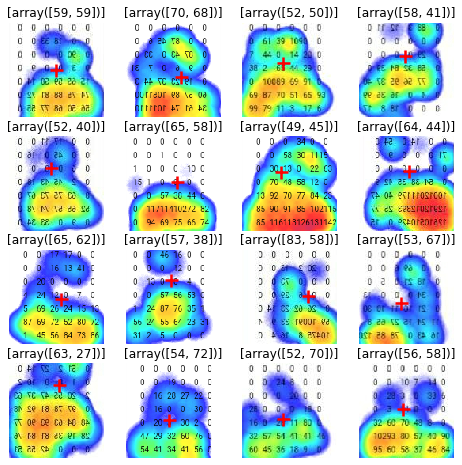

In [63]:
%%time

# plot_number_of_sample = MULTI_BATCH_SIZE
# col_size = row_size = int(np.sqrt(MULTI_BATCH_SIZE))
# # row_size = np.sqrt(MULTI_BATCH_SIZE)
# print(col_size)

plt.figure(figsize=(8, 8))
for images, labels in train_ds_pre_toe_s.take(1):
    print('batch * multi:', len(labels), ', MULTI_BATCH_SIZE=', MULTI_BATCH_SIZE)
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title([labels[i].numpy()])
        plt.axis("off")
        
        plt.plot(labels[i].numpy()[0], labels[i].numpy()[1], 'r+', markersize=13, mew=2.5)

In [64]:
# %%time

# # NOrmalized xy to [0, 1] #

# # plot_number_of_sample = MULTI_BATCH_SIZE
# # col_size = row_size = int(np.sqrt(MULTI_BATCH_SIZE))
# # # row_size = np.sqrt(MULTI_BATCH_SIZE)
# # print(col_size)

# plt.figure(figsize=(8, 8))
# for images, labels in train_ds_pre_toe_s.take(1):
#     print('batch * multi:', len(labels), ', MULTI_BATCH_SIZE=', MULTI_BATCH_SIZE)
#     for i in range(16):
#         ax = plt.subplot(4, 4, i + 1)
#         plt.imshow(images[i].numpy().astype("uint8"))
#         plt.title([labels[i].numpy()])
#         plt.axis("off")
        
#         plt.plot(labels[i].numpy()[0]*120, labels[i].numpy()[1]*120, 'r+', markersize=13, mew=2.5)

In [65]:
# %%time

# # NOrmalized xy to [0, 1] #

# # plot_number_of_sample = MULTI_BATCH_SIZE
# # col_size = row_size = int(np.sqrt(MULTI_BATCH_SIZE))
# # # row_size = np.sqrt(MULTI_BATCH_SIZE)
# # print(col_size)

# plt.figure(figsize=(8, 8))
# for images, labels in train_ds_pre_heel_s.take(1):
#     print('batch * multi:', len(labels), ', MULTI_BATCH_SIZE=', MULTI_BATCH_SIZE)
#     for i in range(16):
#         ax = plt.subplot(4, 4, i + 1)
#         plt.imshow(images[i].numpy().astype("uint8"))
#         plt.title([labels[i].numpy()])
#         plt.axis("off")
        
#         plt.plot(labels[i].numpy()[0]*120, labels[i].numpy()[1]*120, 'r+', markersize=13, mew=2.5)

In [66]:
# %%time

# plt.figure(figsize=(8, 8))
# for images, labels in train_ds_pre_heel_s.take(1):
#     print('batch * multi:', len(labels))
#     for i in range(16):
#         ax = plt.subplot(4, 4, i + 1)
#         plt.imshow(images[i].numpy().astype("uint8"))
#         plt.title(str(labels[i].numpy()))
#         plt.axis("off")
        
#         plt.plot(labels[i].numpy()[0], labels[i].numpy()[1], 'b+', markersize=13, mew=2.5)
# #         print((labels[i].numpy()[0], labels[i].numpy()[1]))

In [67]:
# create it_ds once
it_train_ds_pre_toe = iter(train_ds_pre_toe_s)

In [68]:
# image_batch, label_batch = next(it_train_ds_pre_toe)

# plt.figure(figsize=(18, 18))
# for i in range(64):
#     ax = plt.subplot(8, 8, i + 1)
#     plt.imshow(image_batch[i].numpy().astype("uint8"))
#     plt.title('x1,y1:' + str(label_batch[i].numpy()))
#     plt.axis("off")
    
#     #print(label_batch[i])
#     plt.plot(label_batch[i].numpy()[0], label_batch[i].numpy()[1], 'r+', markersize=13, mew=2.5)

### [OLD] Split train_ds_pre

##### train_ds_pre_s
##### valid_ds_pre_s 

### re-set to toe/heel split
##### train_ds_pre_toe_s
##### valid_ds_pre_toe_s

##### train_ds_pre_heel_s
##### valid_ds_pre_heel_s

#### split Toe

In [69]:
# # split Toe
# val_size = int(tf.data.experimental.cardinality(train_ds_pre_toe).numpy() * 0.2)

# train_ds_pre_toe_s = train_ds_pre_toe.skip(val_size)
# valid_ds_pre_toe_s = train_ds_pre_toe.take(val_size)

# print(len(train_ds_pre_toe))
# print(val_size)
# print(tf.data.experimental.cardinality(train_ds_pre_toe_s).numpy())
# print(tf.data.experimental.cardinality(valid_ds_pre_toe_s).numpy())

#### split Heel

In [70]:
# # split Heel
# val_size = int(tf.data.experimental.cardinality(train_ds_pre_heel).numpy() * 0.2)

# train_ds_pre_heel_s = train_ds_pre_heel.skip(val_size)
# valid_ds_pre_heel_s = train_ds_pre_heel.take(val_size)

# print(len(train_ds_pre_heel))
# print(val_size)
# print(tf.data.experimental.cardinality(train_ds_pre_heel_s).numpy())
# print(tf.data.experimental.cardinality(valid_ds_pre_heel_s).numpy())

### 3.Loss function

* mae
* euclidean distance
* others


        # 'x' is [[1, 1, 1]
        #         [1, 1, 1]]
        tf.reduce_sum(x) ==> 6
        tf.reduce_sum(x, 0) ==> [2, 2, 2]
        tf.reduce_sum(x, 1) ==> [3, 3]
        the function is default for 2-D array, therefor, in our 1-D [x1,y1] to [x2,y2] the axis should be '0' or just leave it.
        
        tf.sqrt need 	A tf.Tensor of type bfloat16, half, float32, float64, complex64, complex128
        so, convert it first.

should be -> tf.Tensor([56 39], shape=(2,), dtype=int64)

In [71]:
y_true = [10, 10]
y_pred = [10, 20]

# y_true = [1.00000000000000000000123, 10]
# y_pred = [1.0, 10.000000000000000000000000001]

# y_true = [1.0000123, 10]
# y_pred = [1.0, 10.0000321]


In [72]:
# mae

loss_mae = tf.keras.losses.MAE(
    y_true, y_pred
)

loss_mae

<tf.Tensor: shape=(), dtype=int32, numpy=5>

In [73]:
# ed

# loss_ed = tf.sqrt(tf.reduce_sum(tf.square(tf.constant(y_true) - tf.constant(y_pred)), 0))

# loss_ed = tf.sqrt(tf.reduce_sum(tf.square(tf.Variable(y_true) - tf.Variable(y_pred)), 0))

loss_ed = tf.sqrt(tf.reduce_sum(tf.square(tf.cast(y_true, tf.float32) - tf.cast(y_pred, tf.float32)), 0))

loss_ed

<tf.Tensor: shape=(), dtype=float32, numpy=10.0>

In [74]:
def ed_loss(y_true, y_pred):
    return tf.sqrt(tf.reduce_sum(tf.square(tf.cast(y_true, tf.float32) - tf.cast(y_pred, tf.float32)), 0))

# fix NaN in euclidean distance
# tf.maximum(d, 1e-9), to keep atlease is 1e-9.
# def ed_loss(y_true, y_pred):
#     return tf.sqrt(tf.maximum(tf.reduce_sum(tf.square(tf.cast(y_true, tf.float32) - tf.cast(y_pred, tf.float32)), 0), 1e-9))


In [75]:
# check the euclidean distance loss
ed_loss(y_true, y_pred).numpy()

10.0

In [76]:
ed_loss(y_true, y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=10.0>

#### mean Euclidean distance 

* here the y_true and y_pred is 2-D array. the axis use 1.


* NOTE: LB評分的mean euclidean distance功能，應該跟model.evaluate()一樣so不需重新寫。evaluate()會自動用loss (model.metrics_names)計算後在自動平均，而模型loss我們是用ed-loss取代。

In [77]:
# y_true = [[60, 76],
#        [58, 49 ],
#        [63, 67 ],
#        [58 , 57]]
# y_pred = [[59.927303, 76.471214],
#        [58.056904, 49.98754 ],
#        [63.067844, 67.03861 ],
#        [58.70202 , 57.372707]]

y_true = [[60, 70],
       [70, 80]]
y_pred = [[61, 71],
       [72, 82]]

# y_true = [(60, 70),
#        (70, 80)]
# y_pred = [(61, 71),
#        (72, 82)]

In [78]:
tf.square(tf.cast(y_true, tf.float32) - tf.cast(y_pred, tf.float32))

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1., 1.],
       [4., 4.]], dtype=float32)>

In [79]:
tf.reduce_sum(tf.square(tf.cast(y_true, tf.float32) - tf.cast(y_pred, tf.float32)), 1)

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([2., 8.], dtype=float32)>

In [80]:
def ed_metric_2d(y_true, y_pred):
    return tf.sqrt(tf.reduce_sum(tf.square(tf.cast(y_true, tf.float32) - tf.cast(y_pred, tf.float32)), 1))


In [81]:
ed_metric_2d(y_true, y_pred).numpy()

array([1.4142135, 2.828427 ], dtype=float32)

In [82]:
ed_metric_2d(y_true, y_pred)

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([1.4142135, 2.828427 ], dtype=float32)>

In [83]:
# 等於true, pred點位ed的平均，LB評分方式。(toe/heel即p1,p2要個別算ed一次再相加)
def ed_metric_2d_mean(y_true, y_pred):
    return tf.reduce_mean(tf.sqrt(tf.reduce_sum(tf.square(tf.cast(y_true, tf.float32) - tf.cast(y_pred, tf.float32)), 1)))

In [84]:
# for re-scale back xy 
# return img, [(x1-60)/60,((y1-y_offset_toe)-60)/60]#normalized [-1,1] 
# return img, [(x2-60)/60,((y2-y_offset_toe)-60)/60]#normalized [-1,1] 

# 等於true, pred點位ed的平均，LB評分方式。(toe/heel即p1,p2要個別算ed一次再相加)
def edRescal(y_true, y_pred):
    return tf.reduce_mean(tf.sqrt(tf.reduce_sum(tf.square(tf.cast((y_true*60)+60, tf.float32) - tf.cast((y_pred*60)+60, tf.float32)), 1)))

In [85]:
ed_metric_2d_mean(y_true, y_pred).numpy()

2.1213202

In [86]:
ed_metric_2d_mean(y_true, y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=2.1213202>

### Test howto contact the all pred reuslt for submit.CSV

In [87]:
# append test
aa= [[ 32.0332  , 105.49409 ],
       [ 68.21191 ,  83.02111 ],
       [ 32.07095 ,  99.04422 ]]
bb= [[ 11.0332  , 22.49409 ],
       [ 33.21191 ,  44.02111 ]]
all_pred = np.append(aa, bb, axis=0)#上下接

In [88]:
all_pred

array([[ 32.0332 , 105.49409],
       [ 68.21191,  83.02111],
       [ 32.07095,  99.04422],
       [ 11.0332 ,  22.49409],
       [ 33.21191,  44.02111]])

In [89]:
all_pred.shape

(5, 2)

In [90]:
all_pred_12 = np.append(all_pred, all_pred, axis=1)#左右接

In [91]:
all_pred_12

array([[ 32.0332 , 105.49409,  32.0332 , 105.49409],
       [ 68.21191,  83.02111,  68.21191,  83.02111],
       [ 32.07095,  99.04422,  32.07095,  99.04422],
       [ 11.0332 ,  22.49409,  11.0332 ,  22.49409],
       [ 33.21191,  44.02111,  33.21191,  44.02111]])

In [92]:
all_pred_12.shape

(5, 4)

# multi output regression model

In [93]:
# from tensorflow import keras 
# from tensorflow.keras import models
# from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

# model_name = 'simple-Conv2D'

# model = models.Sequential()
# model.add(Conv2D(16, (3, 3), input_shape=(120, 120, 3), activation='relu'))#fix by filters, (ks,ks)
# # model.add(Conv2D(3, 3, input_shape=(120, 120, 3), activation='relu'))# still run
# model.add(MaxPool2D(pool_size=(2, 2)))
# model.add(Conv2D(32, 3, 3, activation='relu'))
# model.add(MaxPool2D(pool_size=(2, 2)))
# model.add(Conv2D(64, 3, 3, activation='relu'))
# model.add(MaxPool2D(pool_size=(2, 2)))
# model.add(Flatten())
# model.add(Dense(500, activation='relu'))
# model.add(Dense(100, activation='relu'))
# model.add(Dense(20, activation='relu'))
# model.add(Dense(2))

In [94]:
# ep_num = 10


In [95]:
# model.compile(optimizer='adam', loss=ed_metric_2d_mean)#, metrics=['mae'])


In [96]:
# %%time
# # fit the model on all data

# ### re-set to toe/heel split
# ##### train_ds_pre_toe_s
# ##### valid_ds_pre_toe_s
# model.fit(train_ds_pre_toe_s, verbose=1, epochs=ep_num, validation_data=valid_ds_pre_toe_s)#, validation_split=0.1)

# ##### train_ds_pre_heel_s
# ##### valid_ds_pre_heel_s
# # model.fit(train_ds_pre_heel_s, verbose=1, epochs=ep_num, validation_data=valid_ds_pre_heel_s)#, validation_split=0.1)


In [97]:
# model.evaluate(valid_ds_pre_toe_s)

In [98]:
# model.evaluate(valid_ds_pre_heel_s)

# EFNE Training

maybe mae better than ed loss?

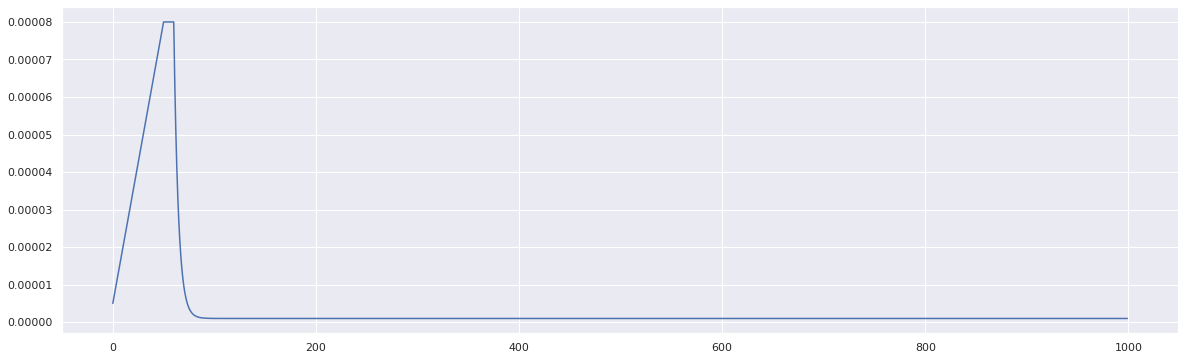

In [99]:
"""lr from kaggle leaf"""
ep_num = 1000

lr_start   = 0.000005
lr_max     = 0.00000125 * strategy.num_replicas_in_sync * BATCH_SIZE
lr_min     = 0.000001
lr_ramp_ep = 50
lr_sus_ep  = 10
lr_decay   = 0.8

def lrfn2(epoch):
    if epoch < lr_ramp_ep:
        lr = (lr_max - lr_start) / lr_ramp_ep * epoch + lr_start

    elif epoch < lr_ramp_ep + lr_sus_ep:
        lr = lr_max

    else:
        lr = (lr_max - lr_min) * lr_decay**(epoch - lr_ramp_ep - lr_sus_ep) + lr_min

    return lr



rng = [i for i in range(ep_num)]
y = [lrfn2(x) for x in rng]
sns.set(style='darkgrid')
fig, ax = plt.subplots(figsize=(20, 6))
plt.plot(rng, y)

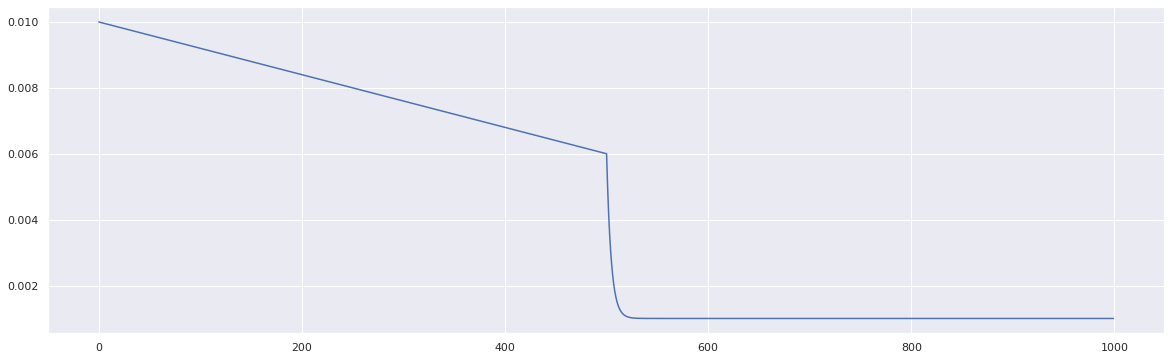

In [215]:
"""dump lr
"""
ep_num = 1000

step_size = 100
lr_max = 0.006
lr_min = 0.001
lr_start = 0.01

lr_init_ep = 0
lr_ramp_ep = 500
lr_sus_ep  = 0
lr_decay   = 0.8

def lrdump(epoch):
    if lr_init_ep -1 < epoch < lr_ramp_ep:
        lr = (lr_max - lr_start) / lr_ramp_ep * epoch + lr_start

    elif epoch < lr_ramp_ep + lr_sus_ep:
        lr = lr_max

    else:
        lr = (lr_max - lr_min) * lr_decay**(epoch - lr_ramp_ep - lr_sus_ep) + lr_min

    return lr

rng = [i for i in range(ep_num)]
y = [lrdump(x) for x in rng]
sns.set(style='darkgrid')
fig, ax = plt.subplots(figsize=(20, 6))
plt.plot(rng, y)

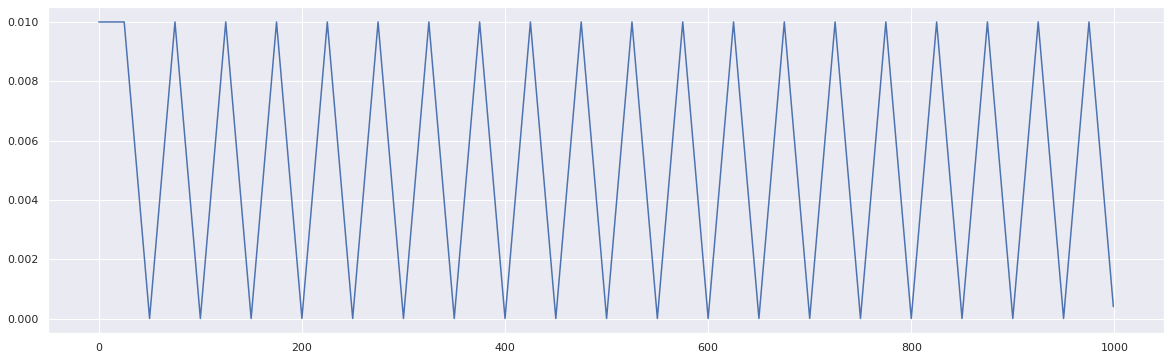

In [101]:

""" simple Cyclical Learning Rate (CLR)
https://www.tensorflow.org/addons/api_docs/python/tfa/optimizers/CyclicalLearningRate
https://github.com/bckenstler/CLR
"""

ep_num = 1000

step_size = 25 # currently best for foot pp
max_lr = 0.01 # currently best for foot pp
base_lr = 0.000001# currently best for foot pp 1e-6

# step_size = 25
# boost_lr = 1e-1
# max_lr = 0.01 #1e-4 #0.01
# base_lr = 0.000001 #1e-12#0.000001
  
def clr(epoch):
    iterations = epoch
    cycle = np.floor(1+iterations/(2*step_size))
    x = np.abs(iterations/step_size - 2*cycle + 1)
    lr = base_lr + (max_lr-base_lr)*np.maximum(0, (1-x))
    
    #todo: boost the lr at initial setps.
    initial_lr = lambda epoch: lr if epoch > step_size else max_lr
#     initial_lr = lambda epoch: lr if epoch > step_size else boost_lr
    lr = initial_lr(epoch)
    #todo: boost the lr at fist step_size.
    
#     decay = ((epoch+1)/ep_num)
#     base_part = 1.01 #1.1
#     print(decay)
#     return lr* (base_part-decay)

    return lr


rng = [i for i in range(ep_num)]
y = [clr(x) for x in rng]
sns.set(style='darkgrid')
fig, ax = plt.subplots(figsize=(20, 6))
plt.plot(rng, y)

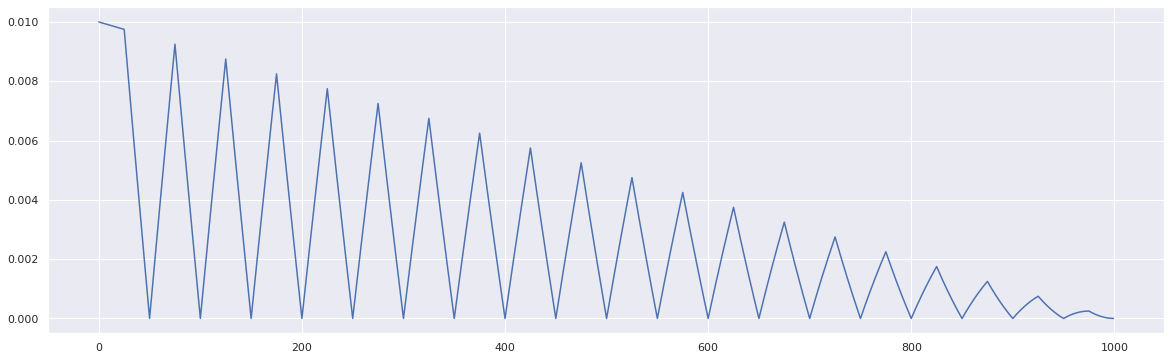

In [102]:

ep_num = 1000

step_size = 25 # currently best for foot pp
max_lr = 0.01 # currently best for foot pp
base_lr = 0.000001# 1e-6 1e-7

def clr2(epoch):
    iterations = epoch
    cycle = np.floor(1+iterations/(2*step_size))
    x = np.abs(iterations/step_size - 2*cycle + 1)
    lr = base_lr + (max_lr-base_lr)*np.maximum(0, (1-x))
    
    #todo: boost the lr at initial setps.
    initial_lr = lambda epoch: lr if epoch > step_size else max_lr
#     initial_lr = lambda epoch: lr if epoch > step_size else boost_lr
    lr = initial_lr(epoch)
    #todo: boost the lr at fist step_size.
    
    decay = ((epoch+1)/ep_num)
    base_part = 1.001 #1.1
#     print(decay)
    return lr* (base_part-decay)


rng = [i for i in range(ep_num)]
y = [clr2(x) for x in rng]
sns.set(style='darkgrid')
fig, ax = plt.subplots(figsize=(20, 6))
plt.plot(rng, y)

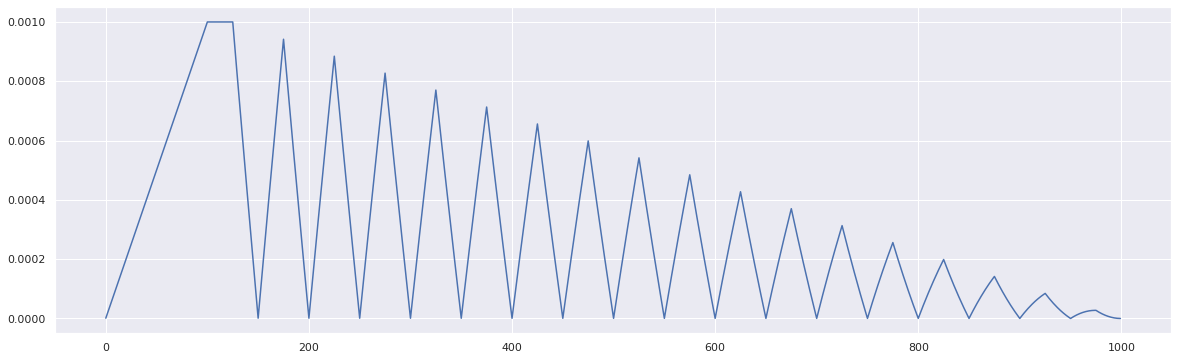

In [103]:
# clr4
# warm up 10% of epoch: it can reduce fall in local min in inital steps.
# CLR本身即有warm up效果

ep_num = 1000

step_size = 25 # 25 better
max_lr = 1e-3 # 
base_lr = 1e-6 # 1e-6 1e-7

# warm up
lr_init_ep = 0
lr_ramp_ep = 100
lr_sus_ep  = 25
lr_decay   = 0.8


def clr4(epoch):
    iterations = epoch
    cycle = np.floor(1+iterations/(2*step_size))
    x = np.abs(iterations/step_size - 2*cycle + 1)
    lr = base_lr + (max_lr-base_lr)*np.maximum(0, (1-x))
    
    #todo: boost the lr at initial setps.
#     initial_lr = lambda epoch: lr if epoch > step_size else max_lr
#     initial_lr = lambda epoch: lr if epoch > step_size else boost_lr
#     lr = initial_lr(epoch)
    #todo: boost the lr at fist step_size.
    
    # warm up
    if epoch < lr_ramp_ep:
        lr = (max_lr) / lr_ramp_ep * epoch + base_lr
    # suspend
    elif lr_ramp_ep <= epoch <= lr_ramp_ep + lr_sus_ep:
        lr = max_lr
    # decay rest others     
    else:      
        #decay = ((epoch+1)/ep_num)
        decay = ((epoch+1-(lr_ramp_ep + lr_sus_ep))/(ep_num-(lr_ramp_ep + lr_sus_ep))) #drag epochs
        base_part = 1.00001 #1.1
        #print(decay)
        lr = lr * (base_part-decay)
    
    return lr

rng = [i for i in range(ep_num)]
y = [clr4(x) for x in rng]
sns.set(style='darkgrid')
fig, ax = plt.subplots(figsize=(20, 6))
plt.plot(rng, y)

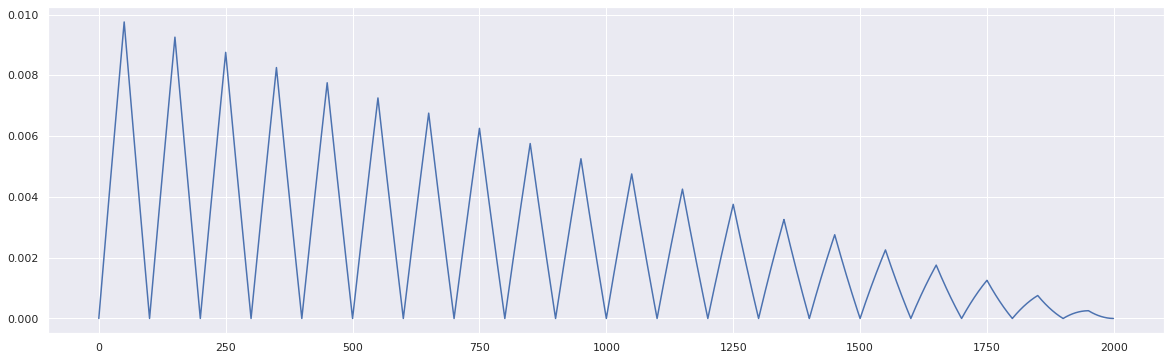

In [172]:
# clr3
# warm up 10% of epoch: it can reduce fall in local min in inital steps.


ep_num = 2000

step_size = 50 # currently best for foot pp
max_lr = 0.01 # currently best for foot pp
base_lr = 1e-6 # 1e-6 1e-7

# warm up
lr_init_ep = 0
lr_ramp_ep = 0
lr_sus_ep  = 0
lr_decay   = 0.8


def clr3(epoch):
    iterations = epoch
    cycle = np.floor(1+iterations/(2*step_size))
    x = np.abs(iterations/step_size - 2*cycle + 1)
    lr = base_lr + (max_lr-base_lr)*np.maximum(0, (1-x))
    
    #todo: boost the lr at initial setps.
#     initial_lr = lambda epoch: lr if epoch > step_size else max_lr
#     initial_lr = lambda epoch: lr if epoch > step_size else boost_lr
#     lr = initial_lr(epoch)
    #todo: boost the lr at fist step_size.
    
    # warm up
    if epoch < lr_ramp_ep:
        lr = (max_lr - base_lr) / lr_ramp_ep * epoch + base_lr
    
    decay = ((epoch+1)/ep_num)
    base_part = 1.001 #1.1
#     print(decay)
    return lr * (base_part-decay)


rng = [i for i in range(ep_num)]
y = [clr3(x) for x in rng]
sns.set(style='darkgrid')
fig, ax = plt.subplots(figsize=(20, 6))
plt.plot(rng, y)

In [173]:
print('{} ~ {}'.format(min(y), max(y)))

5.0499999999999876e-08 ~ 0.009755


In [174]:
for e, lr in zip(rng,y):
    print('{}\t {}\n'.format(e, lr))

0	 1.0005e-06

1	 0.00020098000000000018

2	 0.0004007595200000004

3	 0.0006003390600000006

4	 0.0007997186200000008

5	 0.000998898200000001

6	 0.0011978778000000011

7	 0.0013966574200000013

8	 0.0015952370599999991

9	 0.0017936167199999991

10	 0.0019917964

11	 0.0021897761

12	 0.00238755582

13	 0.00258513556

14	 0.00278251532

15	 0.0029796951

16	 0.0031766749000000007

17	 0.0033734547200000007

18	 0.0035700345599999988

19	 0.003766414419999999

20	 0.0039625942999999995

21	 0.004158574199999999

22	 0.00435435412

23	 0.00454993406

24	 0.00474531402

25	 0.004940494

26	 0.005135474

27	 0.00533025402

28	 0.005524834060000001

29	 0.005719214120000001

30	 0.005913394200000001

31	 0.006107374300000001

32	 0.006301154420000002

33	 0.0064947345600000015

34	 0.006688114720000002

35	 0.0068812948999999995

36	 0.0070742751

37	 0.007267055319999999

38	 0.00745963556

39	 0.00765201582

40	 0.0078441961

41	 0.008036176399999997

42	 0.008227956719999999

43	 0.00

In [175]:
# lr_reduceonplateau = tf.keras.callbacks.ReduceLROnPlateau(monitor=monitor, factor=0.1, patience=5, verbose=1, mode='auto', min_delta=0.0001, cooldown=0, min_lr=1e-12)

In [176]:
# Callback for printing the LR at the end of each epoch.
class PrintLRtoe(tf.keras.callbacks.Callback):
    def on_epoch_begin(self, epoch, logs=None):
#     def on_epoch_end(self, epoch, logs=None):
#         print('\n[{}] Learning rate for epoch {} is {}'.format(
#             datetime.now().strftime("%Y%m%d-%H%M-%S"), 
#             epoch + 1,
#             self.model.optimizer.lr.numpy()))
        print('\n[{}] Learning rate for epoch {} is {}'.format(
        datetime.now().strftime("%Y%m%d-%H%M-%S"), 
        epoch + 1,
        model_toe.optimizer._decayed_lr(tf.float32).numpy()))

In [177]:
# Callback for printing the LR at the end of each epoch.
class PrintLRheel(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
#         print('\nLearning rate for epoch {} is {}'.format(epoch + 1,
#                                               model_heel.optimizer.lr.numpy()))
        print('\n[{}] Learning rate for epoch {} is {}'.format(
        datetime.now().strftime("%Y%m%d-%H%M-%S"), 
        epoch + 1,
        model_heel.optimizer._decayed_lr(tf.float32).numpy()))

### Output dir and models

In [178]:
def mk_log_dir(log_dir_name):
    try:
        os.makedirs(log_dir_name)
    except OSError as e:
        print("This log dir exist.")
        if e.errno != errno.EEXIST:
            raise ValueError("we got problem.")

In [179]:
monitor = 'val_loss' #'val_loss' 'val_accuracy' if use ed_loss it still the loss here.

log_dir_name = datetime.now().strftime("%Y%m%d-%H%M%S") 

# mk_log_dir(datetime.now().strftime("%Y%m%d-%H%M%S") )  

In [180]:
# use once at the time
mk_log_dir(log_dir_name)

# Toe

In [181]:
model_name = 'EfficientNetB0'

In [182]:
#get_best_model_name

# best_model_name = './' + model_name + '_bs-' + str(BATCH_SIZE) + '_s-' + str(img_height) + '_' + "ep-{epoch:02d}-vloss-{val_loss:.2f}" +'_best-weight.h5'
# best_model_name = '{model_name}-ep{epoch:03d}-loss{loss:.3f}-val_loss{val_loss:.3f}.h5'
#best_model_name = './' + model_name + '_bs' + str(BATCH_SIZE) + '_w' + str(img_width) + '_' + monitor + '_best.h5'
# best_model_name = './Leaf_' + model_name + '_bs' + str(BATCH_SIZE) + '_w' + str(img_width) + '_' + datetime.now().strftime("%Y%m%d-%H%M%S") + '_best_' + monitor + '.h5'

# best_model_name = './cop' + model_name + '_bs' + str(BATCH_SIZE) + '_w' + str(img_width) + '_' + datetime.now().strftime("%Y%m%d-%H%M%S") + '_best_' + monitor + '.h5'

def get_best_model_name(th):
    return './' + log_dir_name + '/' + th + '_' + model_name + '_bs' + str(BATCH_SIZE) + '_w' + str(img_width) + '_best_' + monitor + '.h5'

th = 'toe'
# th = 'heel'

print(get_best_model_name(th))

best_model_name = get_best_model_name(th)


best_model_save = tf.keras.callbacks.ModelCheckpoint(filepath=best_model_name, 
                             save_best_only = True, 
                             save_weights_only = False,
                             monitor = monitor, 
                             mode = 'auto', verbose = 1)
print('best_model_name:', best_model_name)

./20210202-115009/toe_EfficientNetB0_bs64_w120_best_val_loss.h5
best_model_name: ./20210202-115009/toe_EfficientNetB0_bs64_w120_best_val_loss.h5


In [115]:
logdir = log_dir_name + "/logs/toe/"

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [183]:
callbacks = [
#     tensorboard_callback,
    best_model_save,
    tf.keras.callbacks.EarlyStopping(monitor=monitor, patience=2000), #patience=step_size or ep_num
#     lr_reduceonplateau,
    tf.keras.callbacks.LearningRateScheduler(clr3),#lrdump, decay or lrfn or lrfn2. clr
    PrintLRtoe()
]

In [184]:
# create keras model

# model_name = 'EfficientNetB0'

top_dropout_rate = 0.9 #less dp rate, say 0.1, train_loss will lower than val_loss
drop_connect_rate = 0.9 #for efnet This parameter serves as a toggle for extra regularization in finetuning, but does not affect loaded weights.

with strategy.scope():
    
    base_model = tf.keras.applications.EfficientNetB0(include_top=False, weights="imagenet", input_shape=(120,120,3), drop_connect_rate=drop_connect_rate) #{'imagenet', None}

    # Freeze the pretrained weights
    base_model.trainable = False
    print("base_model.trainable : ", base_model.trainable)

    # Rebuild top
    gap2d = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
    BNL = tf.keras.layers.BatchNormalization()(gap2d) #tood: remove#
    dropout = tf.keras.layers.Dropout(top_dropout_rate)(BNL)#tood: remove# J add dropout, for flood 0.2 is ok. for leaf 0.4 is better.
    outputs = tf.keras.layers.Dense(2)(dropout)# remove activation for regression output (to default, the linear), , activation = 'relu' no help

    # Compile new model
    model_toe = tf.keras.Model(base_model.input, outputs, name=model_name)


#     # unfreeze the top #fine_tune_at# layers while leaving BatchNorm layers frozen
#     fine_tune_at = 20 #10 #241 #20
#     print('[Note] Now create model fine tuneing at Top-{} layers!'.format(fine_tune_at))
#     for layer in model_toe.layers[-fine_tune_at:]:
#         if not isinstance(layer, tf.keras.layers.BatchNormalization):
#             layer.trainable = True

    
    #[set one layer's name and successive layers trainable.]
    model_toe.trainable = True
    set_trainable = False
    for layer in model_toe.layers:
        if layer.name == 'block5b_expand_conv': #'block7a_expand_conv'20 'block6c_expand_conv'50 'block5b_expand_conv'109
            set_trainable = True
        if set_trainable:
            layer.trainable = True
        else:
            layer.trainable = False

    model_toe.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),#RMSprop , Adam, SGD Adadelta(learning_rate=0.001), if set lr_callback the learning_rate=0.001 will not effeced.
                    loss=ed_metric_2d_mean)
                      #metrics=[tf.keras.metrics.MeanSquaredError()])
                      #metrics=[edRescal])
    
#     loss=tf.keras.losses.MeanSquaredError()
                    #ed_metric_2d_mean,#, ed_loss ed_metric_2d ed_metric_2d_mean            
                    #metrics=['mae', 'accuracy'])#!!note!! for keypoint regression should use MSE loss 01/29#
        



# # AdaBeliefOptimizer(learning_rate=1e-3, epsilon=1e-14, rectify=False)
# model_toe.compile(optimizer = AdaBeliefOptimizer(learning_rate=1e-3, epsilon=1e-14, rectify=False),#RMSprop , Adam, SGD Adadelta(learning_rate=0.001), if set lr_callback the learning_rate=0.001 will not effeced.
#                 loss=ed_metric_2d_mean)#,#, ed_loss ed_metric_2d ed_metric_2d_mean            
#                 #metrics=['mae', 'accuracy'])

base_model.trainable :  False


In [185]:
len(model_toe.layers)

241

In [186]:
def count_model_trainOrNot_layers(model_toe, printlayers=False):
    tt = 0
    nt = 0
    for layer in model_toe.layers:
        if layer.trainable:
            tt +=1
            if printlayers:
                print(f'{layer.name}')
        else:
            nt +=1
    print(f'tt: {tt}, nt:{nt}, total layers:{tt+nt}')

In [187]:
count_model_trainOrNot_layers(model_toe)

tt: 109, nt:132, total layers:241


In [188]:
%%time

# fit the model on all data
history_toe = model_toe.fit(train_ds_pre_toe_s, 
                      verbose=1, 
                      epochs=ep_num, 
                      validation_data=valid_ds_pre_toe_s, 
                      callbacks=callbacks)#, validation_split=0.1)


[20210202-1150-36] Learning rate for epoch 1 is 1.0004999921875424e-06
Epoch 1/2000
33/34 [============================>.] - ETA: 0s - loss: 81.6839
Epoch 00001: val_loss improved from inf to 81.61148, saving model to ./20210202-115009/toe_EfficientNetB0_bs64_w120_best_val_loss.h5
34/34 [==============================] - 14s 405ms/step - loss: 81.7112 - val_loss: 81.6115

[20210202-1151-01] Learning rate for epoch 2 is 0.0002009799936786294
Epoch 2/2000
33/34 [============================>.] - ETA: 0s - loss: 81.8287
Epoch 00002: val_loss improved from 81.61148 to 81.26174, saving model to ./20210202-115009/toe_EfficientNetB0_bs64_w120_best_val_loss.h5
34/34 [==============================] - 2s 52ms/step - loss: 81.8069 - val_loss: 81.2617

[20210202-1151-02] Learning rate for epoch 3 is 0.00040075951255857944
Epoch 3/2000
34/34 [==============================] - ETA: 0s - loss: 81.1938
Epoch 00003: val_loss improved from 81.26174 to 80.51097, saving model to ./20210202-115009/toe_Ef

In [189]:
"""train split有區域最小的問題，相同ds但最佳收斂點不同！"""
"""KFold split may have same issue."""

'KFold split may have same issue.'

In [190]:
# model_toe.summary()

In [191]:
# tf.keras.utils.plot_model(model_toe, show_shapes=True)

In [192]:
# show after modl.fit
model_toe.metrics_names

['loss']

In [193]:
# check metrics the model have.
history_toe.history.keys()

dict_keys(['loss', 'val_loss', 'lr'])

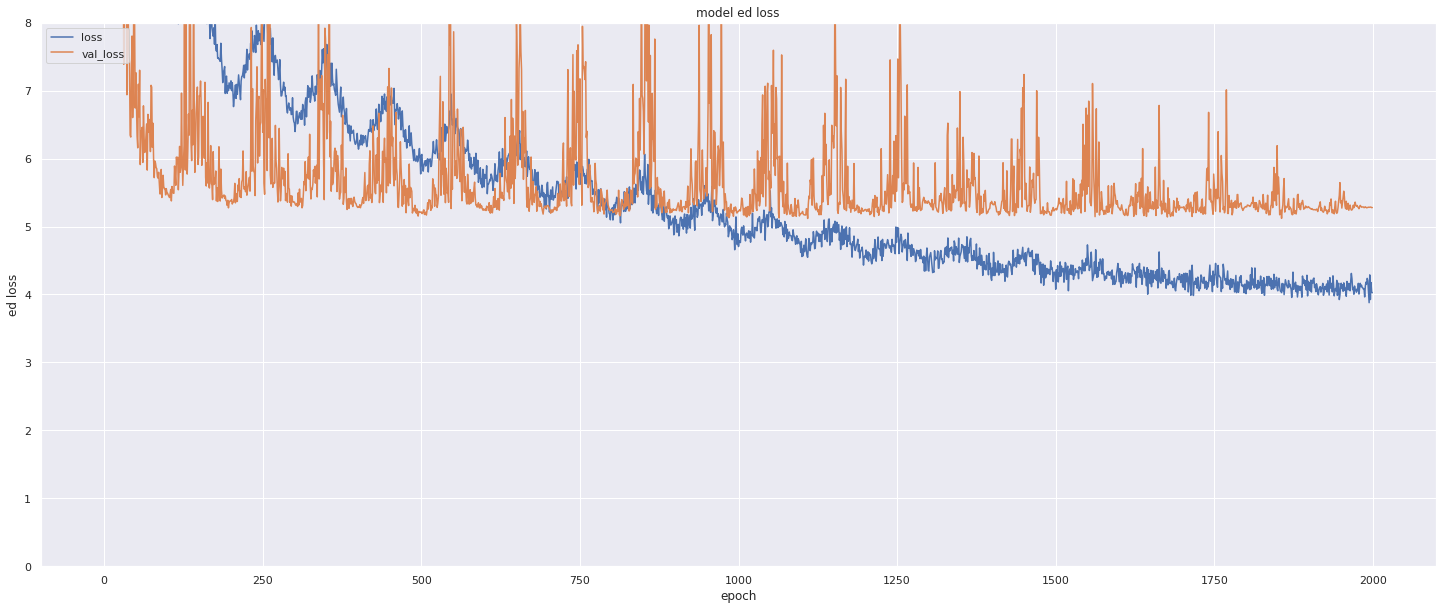

In [194]:
# check the loos the model trained.
plt.figure(figsize=(25, 10))
plt.plot(history_toe.history['loss'])
plt.plot(history_toe.history['val_loss'])
plt.title('model ed loss')
plt.ylabel('ed loss'), plt.ylim(0, 8)# for too large loss
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper left') 
plt.show()


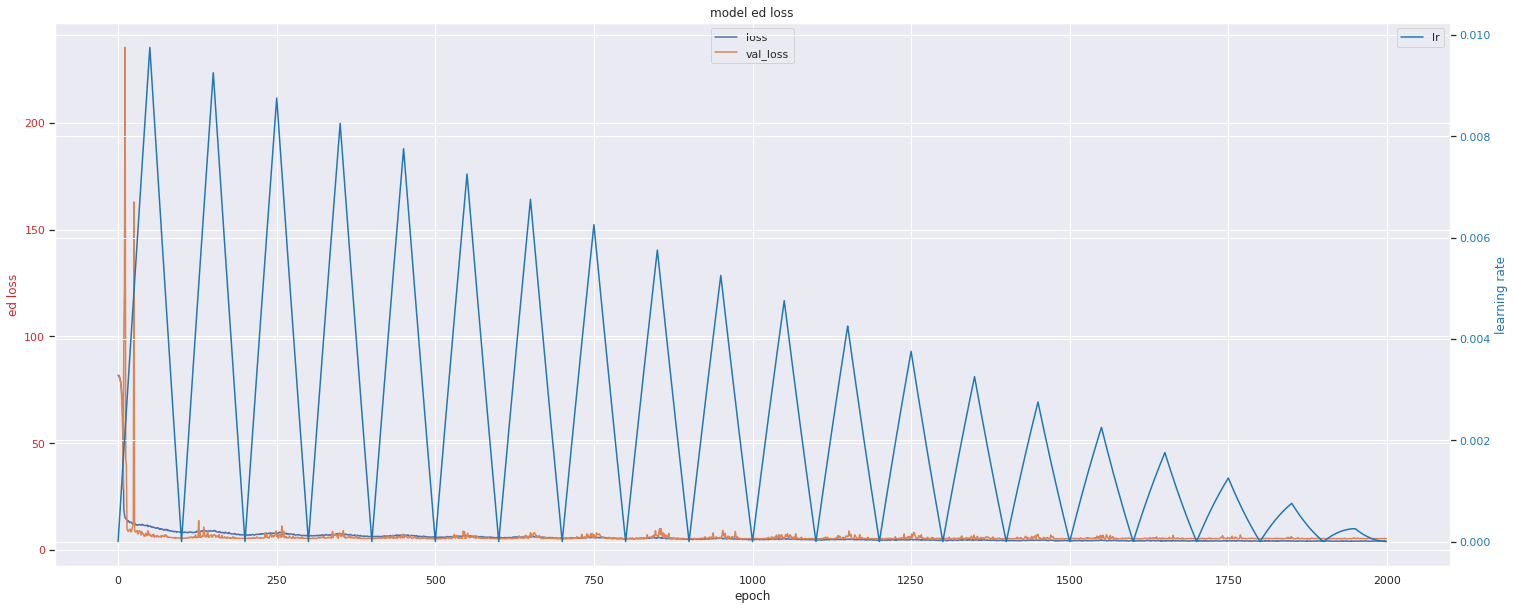

In [195]:
# check the loos the model trained.

# for different scales (different Y-axes)
# fig, ax1 = plt.subplots()
fig, ax1 = plt.subplots(figsize=(25, 10))

# nice to have this colorful tip.
color = 'tab:red'

ax1.set_title('model ed loss')

ax1.set_xlabel('epoch')
ax1.set_ylabel('ed loss', color=color)

ax1.plot(history_toe.history['loss'])
ax1.plot(history_toe.history['val_loss'])
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(['loss', 'val_loss'], loc='upper center') # legend may ocvered by next ax ploting. moved to end.


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('learning rate', color=color)
ax2.plot(history_toe.history['lr'], color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(['lr'], loc='upper right') 

plt.show()


## Check the mean-Euclidean Distance of test data

may modify the ed-loss function

In [ ]:
# mean ed-loss == mean ed of test data.
model_toe.evaluate(valid_ds_pre_toe_s)

# Heel 

In [ ]:
"""

"""
# lr_reduceonplateau = tf.keras.callbacks.ReduceLROnPlateau(monitor=monitor, 
#                                                           factor=0.5, 
#                                                           patience=15, 
#                                                           verbose=1, 
#                                                           mode='auto', 
#                                                           #min_delta=0.0001, 
#                                                           cooldown=5, 
#                                                           #min_lr=1e-12
#                                                          )

In [200]:
def get_best_model_name(th):
    return './' + log_dir_name + '/' + th + '_' + model_name + '_bs' + str(BATCH_SIZE) + '_w' + str(img_width) + '_best_' + monitor + '.h5'

# th = 'toe'
th = 'heel'

print(get_best_model_name(th))

best_model_name = get_best_model_name(th)


best_model_save = tf.keras.callbacks.ModelCheckpoint(filepath=best_model_name, 
                             save_best_only = True, 
                             save_weights_only = False,
                             monitor = monitor, 
                             mode = 'auto', verbose = 1)
print('best_model_name:', best_model_name)

./20210202-115009/heel_EfficientNetB0_bs64_w120_best_val_loss.h5
best_model_name: ./20210202-115009/heel_EfficientNetB0_bs64_w120_best_val_loss.h5


In [201]:
logdir = log_dir_name + "/logs/heel/"

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [209]:
callbacks = [
#     tensorboard_callback,
    best_model_save,
    tf.keras.callbacks.EarlyStopping(monitor=monitor, patience=step_size*4), #patience=step_size or ep_num
#     lr_reduceonplateau,
    tf.keras.callbacks.LearningRateScheduler(clr3),#lrdump, decay or lrfn or lrfn2. clr
    PrintLRheel()
]                                     

In [210]:
# create keras model

model_name = 'EfficientNetB0'

top_dropout_rate = 0.4 
drop_connect_rate = 0.4

with strategy.scope():

    base_model = tf.keras.applications.EfficientNetB0(include_top=False, weights='imagenet', input_shape=(120,120,3), drop_connect_rate=drop_connect_rate)

    # Freeze the pretrained weights
    base_model.trainable = False

    # Rebuild top
    gap2d = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
    BNL = tf.keras.layers.BatchNormalization()(gap2d) #tood: remove#
    dropout = tf.keras.layers.Dropout(top_dropout_rate)(BNL)#tood: remove# J add dropout, for flood 0.2 is ok. for leaf 0.4 is better.
    outputs = tf.keras.layers.Dense(2)(dropout)# remove activation for regression output (to default, the linear), , activation = 'relu' no help

    # Compile new model
    model_heel = tf.keras.Model(base_model.input, outputs, name=model_name)


#     # unfreeze the top #fine_tune_at# layers while leaving BatchNorm layers frozen
#     fine_tune_at = 20 #tt: 16, not include bn
#     for layer in model_heel.layers[-fine_tune_at:]:
#         if not isinstance(layer, tf.keras.layers.BatchNormalization):
#             layer.trainable = True

    #[set one layer's name and successive layers trainable.]
    model_heel.trainable = True
    set_trainable = False
    for layer in model_heel.layers:
        if layer.name == 'block5b_expand_conv': #'block7a_expand_conv'20 'block6c_expand_conv'50 'block5b_expand_conv'109
            set_trainable = True
        if set_trainable:
            layer.trainable = True
        else:
            layer.trainable = False

    model_heel.compile(optimizer = tf.keras.optimizers.Adam(0.01),#RMSprop , Adam
                    loss=ed_metric_2d_mean)
                      #metrics=['mse'])
    
                      #metrics=[edRescal])
    #, ed_loss ed_metric_2d ed_metric_2d_mean            
                    #metrics=['mae', 'accuracy'])


In [211]:
count_model_trainOrNot_layers(model_heel, printlayers=False)

tt: 109, nt:132, total layers:241


In [212]:
%%time

# fit the model on all data
history_heel = model_heel.fit(train_ds_pre_heel_s, 
                      verbose=1, 
                      epochs=ep_num, 
                      validation_data=valid_ds_pre_heel_s, 
                      callbacks=callbacks)

Epoch 1/2000
34/34 [==============================] - ETA: 0s - loss: 116.7569
Epoch 00001: val_loss did not improve from 3.63012

[20210202-1421-09] Learning rate for epoch 1 is 1.0004999921875424e-06
34/34 [==============================] - 25s 726ms/step - loss: 116.7569 - val_loss: 118.2232
Epoch 2/2000
33/34 [============================>.] - ETA: 0s - loss: 116.2440
Epoch 00002: val_loss did not improve from 3.63012

[20210202-1421-10] Learning rate for epoch 2 is 0.0002009799936786294
34/34 [==============================] - 1s 41ms/step - loss: 116.1889 - val_loss: 117.6170
Epoch 3/2000
34/34 [==============================] - ETA: 0s - loss: 114.6586
Epoch 00003: val_loss did not improve from 3.63012

[20210202-1421-33] Learning rate for epoch 3 is 0.00040075951255857944
34/34 [==============================] - 23s 677ms/step - loss: 114.6586 - val_loss: 115.0429
Epoch 4/2000
34/34 [==============================] - ETA: 0s - loss: 113.4627
Epoch 00004: val_loss did not improv

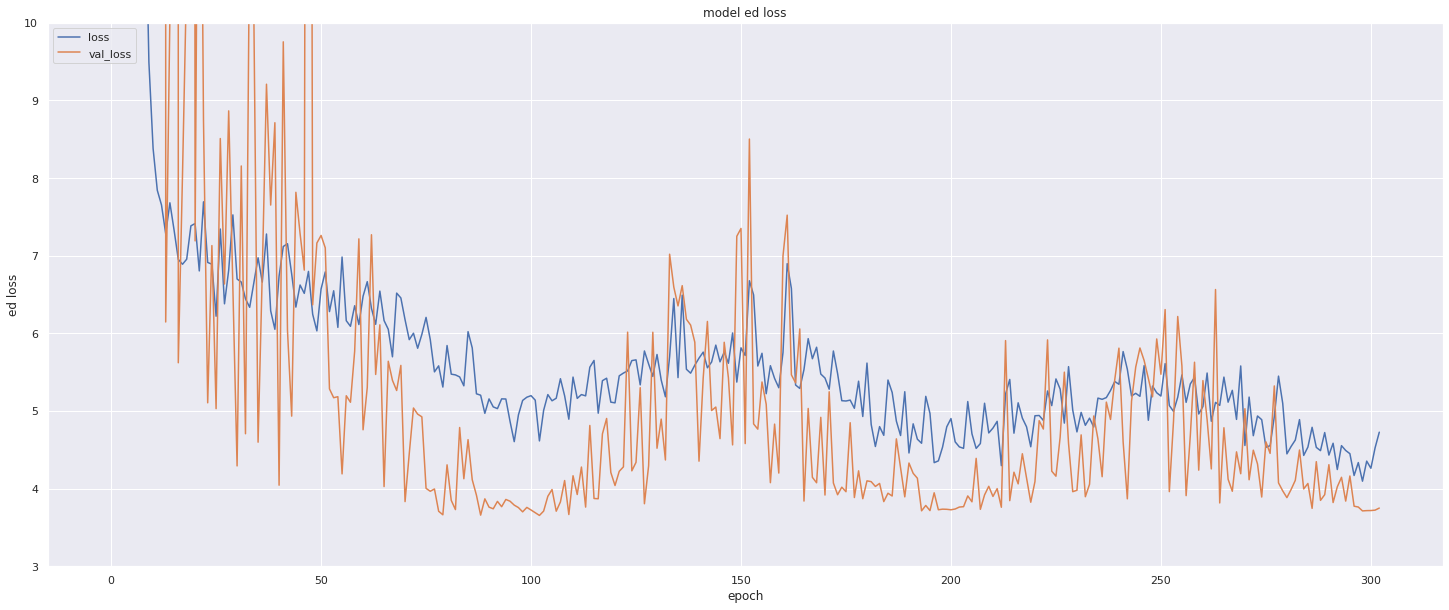

In [213]:
# check the loos the model trained.
plt.figure(figsize=(25, 10))
plt.plot(history_heel.history['loss'])
plt.plot(history_heel.history['val_loss'])
plt.title('model ed loss')
plt.ylabel('ed loss'), plt.ylim(3, 10)# for too large loss
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper left') 
plt.show()

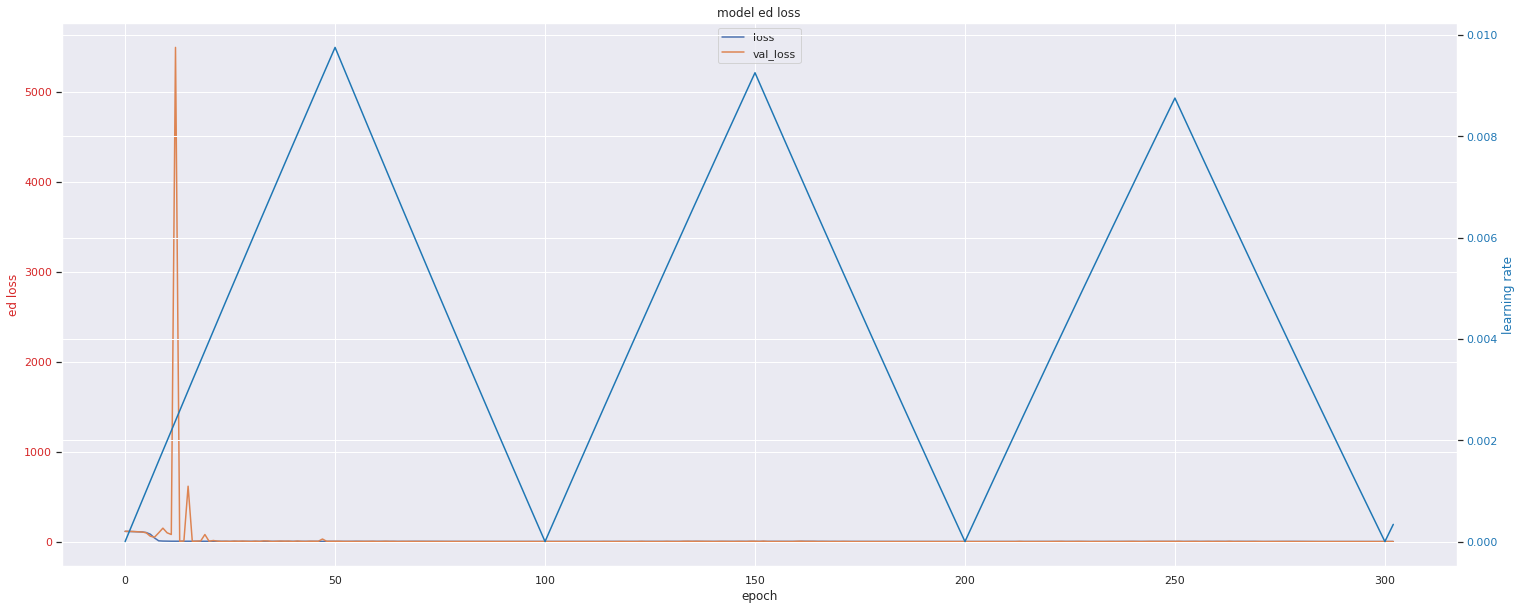

In [214]:
# check the loos the model trained.


# for different scales (different Y-axes)
# fig, ax1 = plt.subplots()
fig, ax1 = plt.subplots(figsize=(25, 10))

# nice to have this colorful tip.
color = 'tab:red'

ax1.set_title('model ed loss')

ax1.set_xlabel('epoch')
ax1.set_ylabel('ed loss', color=color)

ax1.plot(history_heel.history['loss'])
ax1.plot(history_heel.history['val_loss'])
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(['loss', 'val_loss'], loc='upper center') # legend may ocvered by next ax ploting. moved to end.


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('learning rate', color=color)
ax2.plot(history_heel.history['lr'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.show()


In [ ]:
# mean ed-loss == mean ed of test data.
model_heel.evaluate(valid_ds_pre_heel_s)

## Show predictions

In [ ]:
%%time
# inference all val_ds
predictions = model.predict(valid_ds_pre_toe_s)

In [ ]:
predictions.shape

In [ ]:
predictions[:5]

In [ ]:
%%time

# inference bs by bs of val_ds #model.predict()#一次做完即可不用分batch
image_batch, label_batch = valid_ds_pre_heel_s.as_numpy_iterator().next()
pred = model.predict_on_batch(image_batch)

In [ ]:
image_batch.shape

In [ ]:
pred.shape

In [ ]:
pred[:5]

In [ ]:
label_batch[:5]

In [ ]:
#test_ds一次做完即可不用分batch
neg = label_batch - pred
neg[:5]

In [ ]:
neg[:5]

In [ ]:
neg.mean()#所有x,y平均

In [ ]:
neg.mean(axis=0)#所有x 所有y個別平均

In [ ]:
neg.mean(axis=1)#左x右y相加的平均

In [ ]:
np.median(neg)#中位數

In [ ]:
neg.min(axis=0)

In [ ]:
neg.max(axis=0)

In [ ]:
model.metrics_names

## show pp pred

* we can switch toe/hell by comment it

### Baseline Simple2D model

In [ ]:
it_valid_ds_pre_toe_s = iter(valid_ds_pre_toe_s)
# it_valid_ds_pre_heel_s = iter(valid_ds_pre_heel_s)

In [ ]:
%%time

# image_batch, label_batch = next(valid_ds_pre_toe_s)

image_batch, label_batch = next(it_valid_ds_pre_toe_s)
# image_batch, label_batch = next(it_valid_ds_pre_heel_s)


# pred = model_toe.predict_on_batch(image_batch) #predictions
pred = model.predict_on_batch(image_batch) #Simple 2D CNN model predictions

plt.figure(figsize=(20, 20))
for i in range(64):
    ax = plt.subplot(8, 8, i + 1)
    plt.imshow(image_batch[i])
    plt.title(label_batch[i].numpy())
    plt.axis("off")
    
    # note: y_offset_toe for ds image
    
    #ground truth
    plt.plot(label_batch[i].numpy()[0], label_batch[i].numpy()[1], 'r+', markersize=15, mew=4)

    #pred
    plt.plot(pred[i][0], pred[i][1], 'k+', markersize=15, mew=4)

### EFN Toe

In [ ]:
it_valid_ds_pre_toe_s = iter(valid_ds_pre_toe_s)
# it_valid_ds_pre_heel_s = iter(valid_ds_pre_heel_s)

In [ ]:
%%time

# image_batch, label_batch = next(valid_ds_pre_toe_s)

image_batch, label_batch = next(it_valid_ds_pre_toe_s)
# image_batch, label_batch = next(it_valid_ds_pre_heel_s)


pred = model_toe.predict_on_batch(image_batch) #predictions
# pred = model.predict_on_batch(image_batch) #Simple 2D CNN model predictions

plt.figure(figsize=(20, 20))
for i in range(64):
    ax = plt.subplot(8, 8, i + 1)
    plt.imshow(image_batch[i])
    plt.title(label_batch[i].numpy())
    plt.axis("off")
    
    # note: y_offset_toe for ds image
    
    #ground truth
    plt.plot(label_batch[i].numpy()[0], label_batch[i].numpy()[1], 'r+', markersize=15, mew=4)

    #pred
    plt.plot(pred[i][0], pred[i][1], 'k+', markersize=15, mew=4)

In [ ]:
#test_ds一次做完即可不用分batch
neg = label_batch - pred
neg[:5]

In [ ]:
np.abs(neg)[:5]

In [ ]:
neg_abs = np.abs(neg)
neg_abs.mean(axis=0)#所有x 所有y個別平均  neg.mean(axis=0)#所有x 所有y個別平均

#### ED 2D

In [ ]:
# y_pred = neg_abs.mean(axis=0)
ed_metric_2d([0,0], [neg_abs.mean(axis=0)]).numpy()

### EFN Heel

In [ ]:
# it_valid_ds_pre_toe_s = iter(valid_ds_pre_toe_s)
it_valid_ds_pre_heel_s = iter(valid_ds_pre_heel_s)

In [ ]:
%%time

# image_batch, label_batch = next(valid_ds_pre_toe_s)

# image_batch, label_batch = next(it_valid_ds_pre_toe_s)
image_batch, label_batch = next(it_valid_ds_pre_heel_s)


pred = model_heel.predict_on_batch(image_batch) #predictions
# pred = model.predict_on_batch(image_batch) #Simple 2D CNN model predictions

plt.figure(figsize=(20, 20))
for i in range(64):
    ax = plt.subplot(8, 8, i + 1)
    plt.imshow(image_batch[i])
    plt.title(label_batch[i].numpy())
    plt.axis("off")
    
    # note: y_offset_toe for ds image
    
    #ground truth
    plt.plot(label_batch[i].numpy()[0], label_batch[i].numpy()[1], 'r+', markersize=15, mew=4)

    #pred
    plt.plot(pred[i][0], pred[i][1], 'k+', markersize=15, mew=4)

In [ ]:
pred[:5]

In [ ]:
label_batch[:5]

In [ ]:
#test_ds一次做完即可不用分batch
neg = label_batch - pred
neg[:10]

In [ ]:
np.abs(neg)[:10]

In [ ]:
neg_abs = np.abs(neg)
neg_abs.mean(axis=0)#所有x 所有y個別平均  neg.mean(axis=0)#所有x 所有y個別平均

#### ED 2d

In [ ]:
# y_pred = neg_abs.mean(axis=0)
ed_metric_2d([0,0], [neg_abs.mean(axis=0)]).numpy()

# Merg Toe/Heel model and predict the Test data at once

### Create TEST DS

In [ ]:
ts = 'test_submission.csv'
df_ts = pd.read_csv(ts)
df_ts.head(5)

In [ ]:
df_ts['images']

In [ ]:
# from dataframe
list_ds_test = tf.data.Dataset.from_tensor_slices(df_ts['images'])


In [ ]:
len(list_ds_test)#.shape() #take(1)

In [ ]:
# check The type specification of an element of this dataset.
list_ds_test.element_spec

In [ ]:
for f in list_ds_test.take(5):
    print(f'take test sample: {f}')

### TEST DS: Process TEST path to image tensor

In [ ]:
## TEST-DS: re-used from train/val-ds

im_test = 'test_images/'

'''
def get_label(file_path):
    # convert the path to a list of path components
    parts = tf.strings.split(file_path, os.path.sep)
    # The second to last is the class-directory
    boolen = parts[-2] == class_names
    #one_hot_num = np.array(boolen, dtype=np.int) not works should use tf.x repalced.
    one_hot_num = tf.dtypes.cast(boolen, tf.int64)
    one_num = tf.argmax(one_hot_num)
    print('one_num:', one_num)
    # Integer encode the label
    return one_num

def decode_img(img):
    # convert the compressed string to a 3D uint8 tensor
    img = tf.io.decode_jpeg(img, channels=3)
    # resize the image to the desired size
#     return tf.image.resize(img, [img_height, img_width])# augment 已經resize過一次了 但這邊不先做會比較慢
    return tf.cast(tf.image.resize(img, [img_height, img_width]), tf.uint8)# 避免float over at augment
'''

#
# map list to ds, Toe part.
#

def decode_crop_png_toe_test(img):
    # convert the compressed string to a 3D uint8 tensor
    img = tf.io.decode_png(img, channels=3)
    # crop the toe from top-left corner [image, offset_height y1, offset_width x1, target_height, target_width]
    y1=y_offset_toe;    x1=0;    h=img_height;    w=img_width # not the pp location
    img = tf.image.crop_to_bounding_box(img, int(y1), int(x1), h, w)
    #img = tf.image.crop_to_bounding_box(img, int(y1), int(x1), int(y2)-int(y1), int(x2)-int(x1))
    # resize the image to the desired size
    return img

def process_path_toe_test(file_name):
    file_path = im_test + file_name
    #label = get_label(file_path)
    # load the raw data from the file as a string
    img = tf.io.read_file(file_path)#can read the byte string paths b'image_0001.png'
    img = decode_crop_png_toe_test(img)
    return img, file_name

#
# map list to ds, Heel part.
#

def decode_crop_png_heel_test(img):
    # convert the compressed string to a 3D uint8 tensor
    img = tf.io.decode_png(img, channels=3)
    # crop the toe from top-left corner [image, offset_height y1, offset_width x1, target_height, target_width]
    y2=y_offset_heel;    x2=0;    h=img_height;    w=img_width # not the pp location
    img = tf.image.crop_to_bounding_box(img, int(y2), int(x2), h, w)
    #img = tf.image.crop_to_bounding_box(img, int(y1), int(x1), int(y2)-int(y1), int(x2)-int(x1))
    # resize the image to the desired size
    return img

def process_path_heel_test(file_name):
    file_path = im_test + file_name
    #label = get_label(file_path)
    # load the raw data from the file as a string
    img = tf.io.read_file(file_path)#can read the byte string paths b'image_0001.png'
    img = decode_crop_png_heel_test(img)
    return img, file_name


#
# test how to put parameters to map
#

def t_ds_map(file_path,x1,y1,x2,y2):
#     img = get_img('train/images/' + str(file_path))
#     print(file_path)
    return file_path,x1,y1,x2,y2 #img, [x1,y1]
    

In [ ]:
# TEST Toe ds
test_ds_map_toe = list_ds_test.map(process_path_toe_test, num_parallel_calls=AUTOTUNE)

# TEST Heel ds
test_ds_map_heel = list_ds_test.map(process_path_heel_test, num_parallel_calls=AUTOTUNE)

In [ ]:
for img, file_name in test_ds_map_toe.take(5):
    print(f'take sample: {img.shape} {file_name}')
    
print('f', f.dtype)
print('xy', xy.dtype)

### prepare TEST_ds_pre

In [ ]:
def configure_for_performance_cache_test(ds, cache=True):

    if cache:
        ds = ds.cache()
        print("Check cache in memory:Y", cache)
    else:
        print("Check cache in memory:N", cache)
        
#     if augment:
# #         ds = ds.map(data_augment, num_parallel_calls=AUTOTUNE)
#         ds = ds.map(AA, num_parallel_calls=AUTOTUNE)
# #         ds = ds.map(RA, num_parallel_calls=AUTOTUNE)
#         print("Check augment :Y", augment)
#     else:
#         print("Check augment :N", augment)
    
#     #ds = ds.repeat()#TODO:2020-12-14: test
#     ds = ds.shuffle(buffer_size=MULTI_BATCH_SIZE*2) # (buffer_size=MULTI_BATCH_SIZE*5) 6sec,buffer_size=1000 take few sec. or buffer_size=image_count <- take too long # each take ds take 30~45 sec, TODO!!
#     ds = ds.shuffle(len(list_ds), reshuffle_each_iteration=False) #todo: move to ds_pre. see https://www.tensorflow.org/api_docs/python/tf/data/Dataset#shuffle
    ds = ds.batch(1000)# 1k for foot test images #MULTI_BATCH_SIZE for multi-GPUs
    ds = ds.prefetch(buffer_size=AUTOTUNE) #buffer_size=AUTOTUNE seem no speed improve
    
    return ds


In [ ]:
"""
Prepare the ds properties (cache, augment, bs, shuffle, prefetch, etc.) for better performance.
"""
# TEST Toe ds_pre
test_ds_pre_toe = configure_for_performance_cache_test(test_ds_map_toe)

# TEST Heel ds_pre
test_ds_pre_heel = configure_for_performance_cache_test(test_ds_map_heel)

## Predict test (abandon)

### Toe model

In [ ]:
model_toe

In [ ]:
%%time
# inference all test_ds once
predictions_toe = model_toe.predict(test_ds_pre_toe)
predictions_toe.shape

In [ ]:
predictions_toe

### Offset Toe

In [ ]:
predictions_toe[:,1] = predictions_toe[:,1] + y_offset_toe
predictions_toe

### Heel model

In [ ]:
%%time
# inference all test_ds once
predictions_heel = model_heel.predict(test_ds_pre_heel)
predictions_heel.shape

In [ ]:
predictions_heel

### Offset Heel

In [ ]:
predictions_heel[:,1] = predictions_heel[:,1] + y_offset_heel
predictions_heel

### Merge toe/hell pred

In [ ]:
predictions_th = np.append(predictions_toe, predictions_heel, axis=1)#左右接
predictions_th.shape

In [ ]:
predictions_th.shape

In [ ]:
images_name = np.expand_dims(df_ts['images'], axis=1)
images_name.shape

In [ ]:
predictions_merge = np.append(images_name, predictions_th, axis=1)#左右接
predictions_merge.shape

In [ ]:
predictions_merge.take(0)

In [ ]:
df_submission = pd.DataFrame(predictions_merge)
df_submission.columns = ['images','x1','y1','x2','y2']

In [ ]:
df_submission.head(5)

In [ ]:
df_submission.to_csv('submission.csv', index=False)

# Load Best-model

In [ ]:
# if models are in last time frame
best_model_toe_name = get_best_model_name('toe')
best_model_heel_name = get_best_model_name('heel')

# # if toe/heel are in different time frame
# best_model_toe_name = '20210118-212454/toe_EfficientNetB0_bs64_w120_best_val_loss.h5'#6.3318 @e393
# best_model_heel_name = '20210122-084854/heel_EfficientNetB0_bs64_w120_best_val_loss.h5'#3.27979@152




print(best_model_toe_name)
print(best_model_heel_name)
# log_dir_name + '/' + 'leaf-2020-12-01-EfficientNetB7_top-layer50_lr_lrfn_val-acc.8352_wh512_e37.h5'

best_model_toe = tf.keras.models.load_model(best_model_toe_name,compile=False)
best_model_heel = tf.keras.models.load_model(best_model_heel_name,compile=False)

### compile the model separately afterwards. to load model with custom loss function

* https://github.com/tensorflow/tensorflow/issues/32348

In [ ]:
best_model_toe.compile(optimizer = tf.keras.optimizers.Adam(),#RMSprop , Adam
                loss=ed_metric_2d_mean)#, ed_loss ed_metric_2d ed_metric_2d_mean            
                #metrics=['mae', 'accuracy'])
best_model_heel.compile(optimizer = tf.keras.optimizers.Adam(),#RMSprop , Adam
                loss=ed_metric_2d_mean)#, ed_loss ed_metric_2d ed_metric_2d_mean            
                #metrics=['mae', 'accuracy'])

# best_model_toe.compile(optimizer = tf.keras.optimizers.Adam(),#RMSprop , Adam
#                 loss=tf.keras.losses.MeanSquaredError())#, ed_loss ed_metric_2d ed_metric_2d_mean            
#                 #metrics=['mae', 'accuracy'])
# best_model_heel.compile(optimizer = tf.keras.optimizers.Adam(),#RMSprop , Adam
#                 loss=tf.keras.losses.MeanSquaredError())#, ed_loss ed_metric_2d ed_metric_2d_mean            
#                 #metrics=['mae', 'accuracy'])

    

In [ ]:
%%time
# inference all test_ds once
predictions_toe = best_model_toe.predict(test_ds_pre_toe)
predictions_toe.shape

### Offset Toe

In [ ]:
predictions_toe[:,1] = predictions_toe[:,1] + y_offset_toe

# for [0,1]
# predictions_toe[:,0] = predictions_toe[:,0]*120
# predictions_toe[:,1] = predictions_toe[:,1]*120 + y_offset_toe

# # for [-1,1]
# # for re-scale back xy 
# # return img, [(x1-60)/60,((y1-y_offset_toe)-60)/60]#normalized [-1,1] 
# # return img, [(x2-60)/60,((y2-y_offset_heel)-60)/60]#normalized [-1,1] 
# predictions_toe[:,0] = (predictions_toe[:,0]*60)+60
# predictions_toe[:,1] = (predictions_toe[:,1]*60)+60 + y_offset_toe

predictions_toe

In [ ]:
%%time
# inference all test_ds once
predictions_heel = best_model_heel.predict(test_ds_pre_heel)
predictions_heel.shape

### Offset Heel

In [ ]:
predictions_heel[:,1] = predictions_heel[:,1] + y_offset_heel

# for [0,1]
# predictions_heel[:,0] = predictions_heel[:,0]*120
# predictions_heel[:,1] = predictions_heel[:,1]*120 + y_offset_heel

# # for [-1,1]
# predictions_heel[:,0] = (predictions_heel[:,0]*60)+60
# predictions_heel[:,1] = (predictions_heel[:,1]*60)+60 + y_offset_heel

predictions_heel

### Merge toe/hell pred

In [ ]:
predictions_th = np.append(predictions_toe, predictions_heel, axis=1)#左右接
predictions_th.shape

In [ ]:
images_name = np.expand_dims(df_ts['images'], axis=1)
images_name.shape

In [ ]:
predictions_merge = np.append(images_name, predictions_th, axis=1)#左右接
predictions_merge.shape

In [ ]:
df_submission = pd.DataFrame(predictions_merge)
df_submission.columns = ['images','x1','y1','x2','y2']

In [ ]:
submi_name = 'Bth_clr3_2690_ed_' + log_dir_name +'.csv'
# submi_name = 'Bth_clr3_2690_XYnorm[0-1]_' + log_dir_name +'.csv'
df_submission.to_csv(submi_name, index=False)
print('Save {} as submission CSV.'.format(submi_name))

In [ ]:
LB: 	
9.3084957

Bth_clr3_2690_ed_20210201-230808.csv

TOE 開到'block5b_expand_conv'109(不包含nb)
HEEL維持top-20
best t/h:   5.36401/3.24612 (5.36401 + 3.24612 = 8.61013 差LB0.7)
    
    
    todo: split .1 get from orignal pool then take train .9 with augmenting

In [ ]:
df_submission.head()

In [ ]:
#

## save model

In [ ]:

best_model_name = './cop_' + model_name + '_bs' + str(BATCH_SIZE) + '_w' + str(img_width) + '_e' + str(ep_num) + '_' + datetime.now().strftime("%Y%m%d-%H%M%S") + '_.h5'
# model.save(best_model_name)
print("Save model: ", best_model_name)

## Reference

multi output model:
https://navoshta.com/end-to-end-deep-learning/

